# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Tae Keun Jeong 414760
    
    2. Maciej Combrzynski-Nogala 415639
    
    3. Amit Mudgal 414759

## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import subprocess
import graphviz
import warnings
import random
from p_decision_tree.DecisionTree import DecisionTree
from graphviz import Digraph
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

#read the dataset through pandas
df = pd.read_csv("dataset.csv")

#get the 90% of the dataset by fraction and 
sampled_data = df.sample(frac=0.9, random_state=414760)


## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [2]:
#reducing dataset to the instances where SurfaceR feature is less than 50k
new_sampled_data = sampled_data[sampled_data["SurfaceR"] < 50000]

#saving the dataset
#new_sampled_data.to_csv('new_sampled_data.csv')

   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

<AxesSubplot:xlabel='SurfaceR'>

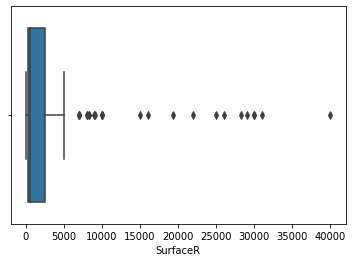

In [3]:
#Visualizing dataset before cleaning
sns.boxplot(x=new_sampled_data['SurfaceR'])

#saving the plot
#plt.savefig('new_sampled_data_boxplot.png')

<AxesSubplot:xlabel='SurfaceR'>

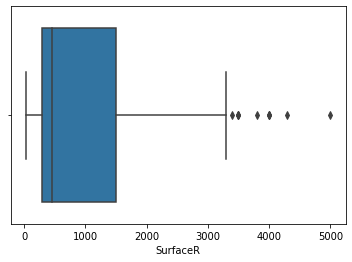

In [4]:
#Calculating first quantile
#Q1 = 300
Q1 = new_sampled_data.SurfaceR.quantile(0.25)
#Calculating third quantile
#Q3 = 2500
Q3 = new_sampled_data.SurfaceR.quantile(0.75)

#Calculating IQR
IQR = Q3 - Q1

#Upper Fence = 5800
Upper_Fence = Q3 + 1.5*IQR
#Lower Fence = -3000 -> 0 -> no outliers under the lower fence
Lower_Fence = Q1 - 1.5*IQR

#Upper_Whisker = 5000
#Calculating Upper whisker
Upper_Whisker = new_sampled_data[new_sampled_data["SurfaceR"] < Upper_Fence].max()["SurfaceR"]

#Lower_Whisker = 30
#Calculating Lower whisker
Lower_Whisker = new_sampled_data[new_sampled_data["SurfaceR"] > Lower_Fence].min()["SurfaceR"]

#Removing instances that are above upper whisker
cleaned_data = new_sampled_data[new_sampled_data["SurfaceR"] <= Upper_Whisker]

#Removing instances that are below lower whisker (for the given dataset, nothing is removed, as all values are above the lower whisker)
cleaned_data = cleaned_data[cleaned_data["SurfaceR"] >= Lower_Whisker]

#Creating boxplot, for the SurfaceR feature in the cleaned dataset
sns.boxplot(x=cleaned_data['SurfaceR'])

#saving the plot
#plt.savefig('cleaned_data_boxplot.png')

(c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets. Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [5]:
print("\nNew sampled data:")
print(new_sampled_data["SurfaceR"].describe())

print("\nCleaned data:")
print(cleaned_data["SurfaceR"].describe())


New sampled data:
count      164.000000
mean      3427.926829
std       6987.327045
min         30.000000
25%        300.000000
50%        600.000000
75%       2500.000000
max      40000.000000
Name: SurfaceR, dtype: float64

Cleaned data:
count     139.000000
mean     1020.719424
std      1120.473916
min        30.000000
25%       300.000000
50%       450.000000
75%      1500.000000
max      5000.000000
Name: SurfaceR, dtype: float64




**Explanation:**

25 Instances(Outliers) were removed.<br>
New_sampled_data has bigger mean, standard deviation and maximum value than the cleaned_data, 
while the minimum value is the same for both.
New_sampled_data has bigger values in 2nd(600 > 450), and 3nd quantiles (2500 > 1500) 
and also bigger median value (600 > 450).

New_sampled_data has significantly bigger standard deviation, it means that values were scattered very far from the mean, 
since the both datasets have the same minimum, and the difference between median is not very big.

Mean is very fluctuating variable, removing 25 outline instances caused mean and std to be significantly reduced.
This indicates that removed 25 outliers were much larger than the mean value.
The std-value is reduced, thus, observations are now more clustered than before.



According to the rules of normal distribution

1) new_sampled_data

2.5% of new_sampled_data = 300 <br>
Lower Specification Limit of new_sampled_data is null, thus it does not exceed the LSL.<br>

97.5% of new_sampled_data = 28947.49999999999 (Upper Specification Limit)<br>
99.7 Quartile of new_sampled_data = 35598.999999999956<br>

μ + 2σ of new_sampled_data = 17402.580919<br>
μ + 3σ of new_sampled_data = 24389.907964 <br>

Values from above exceed both values of μ + 2σ and μ + 3σ, which indicates that this is less likely normal distribution.<br>



2) cleaned data

2.5% of cleaned_data = 300<br>
Lower Specification Limit of new_sampled_data is null,<br>
thus it does not exceed the LSL<br>

cleaned_data.SurfaceR.quantile(0.975) = 4000.000<br>
cleaned_data.SurfaceR.quantile(0.997) = 4710.200<br>

μ + 2σ of cleaned_data = 3261,667256<br>
μ + 3σ of cleaned_data = 4382,141171<br>

Values from above exceed both values of μ + 2σ and μ + 3σ, which indicates that this is less likely normal distribution.<br>

Cleaned_data differs from the both values less than of new_sampled_data.


### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

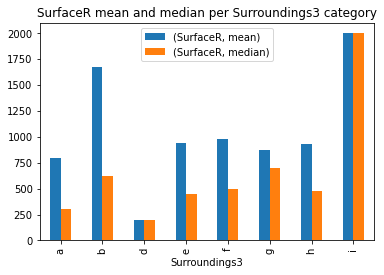

In [6]:
#plotting mean and median of SurfaceR over each category of Surroundings3
cleaned_data[["Surroundings3","SurfaceR"]].groupby(["Surroundings3"]).agg(['mean', 'median']).plot(kind='bar');
plt.legend(title=False, loc="upper center")
plt.title("SurfaceR mean and median per Surroundings3 category");

#saving the plot
#plt.savefig('SurfaceR_per_Surroundings.png')

**Explanation**: <br>
Based on the figure above, we can see that the **maximal** mean and median are for category *i*. <br>
The **minimal** mean and median are in category *d*. <br>

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

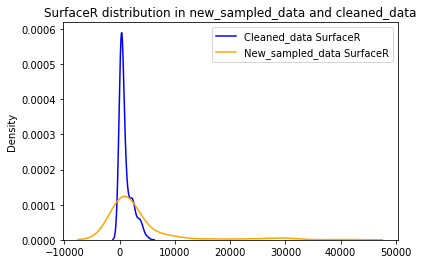

In [7]:
#Plotting SurfaceR distribution for cleand_data and new_sampled_data
sns.distplot(cleaned_data[['SurfaceR']],label='Cleaned_data SurfaceR', color="blue", hist=False, rug=False)
sns.distplot(new_sampled_data[['SurfaceR']],label='New_sampled_data SurfaceR', color="orange", hist=False, rug=False)

plt.legend()
plt.title("SurfaceR distribution in new_sampled_data and cleaned_data")

#saving the plot
#plt.savefig('SurfaceR_distr.png')

plt.show()



(f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

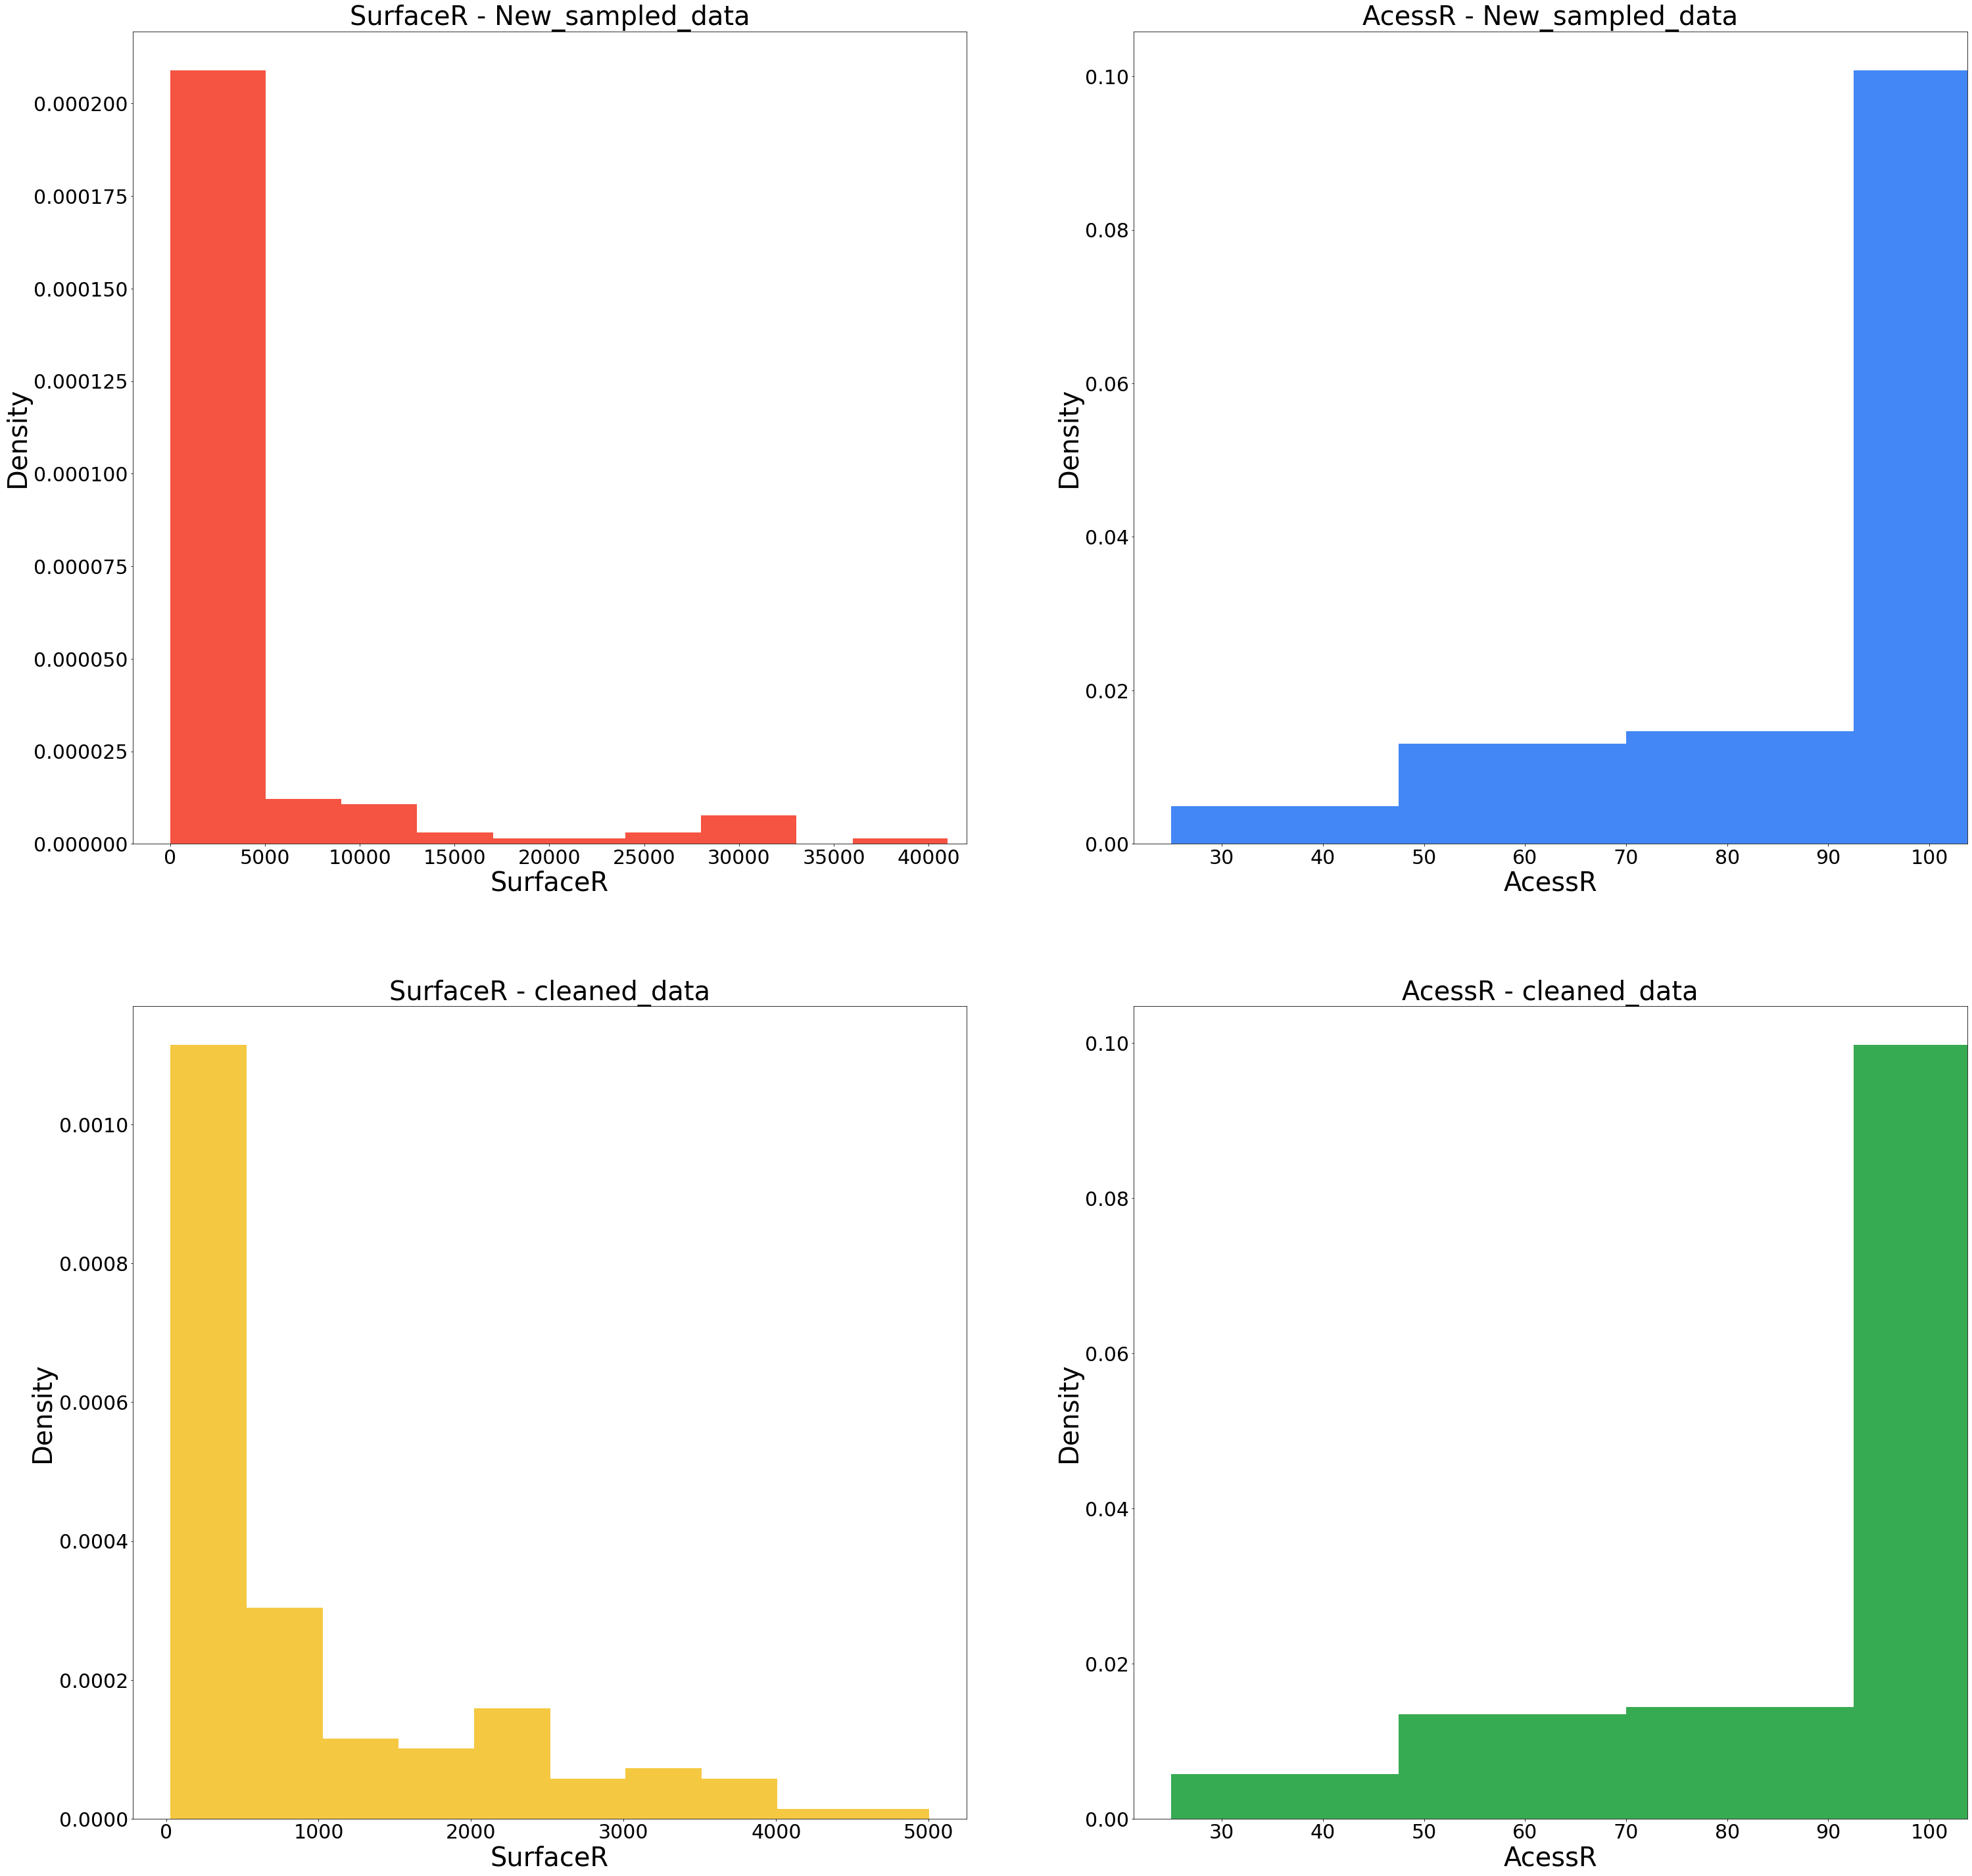

In [8]:
#histogram without boxplot

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(50,50))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(new_sampled_data[['SurfaceR']], density=True, histtype='bar', color='#f55442', width = 5000)
ax0.set_title('SurfaceR - New_sampled_data', size = 40)
ax0.set_ylabel('Density', fontsize = 40.0) # Y label
ax0.set_xlabel('SurfaceR', fontsize = 40) # X label
ax0.tick_params(labelsize = 30)

ax1.hist(new_sampled_data[['AcessR']], density=True, histtype='bar', color='#4287f5', width = 5000)
ax1.set_title('AcessR - New_sampled_data', size = 40)
ax1.set_ylabel('Density', fontsize = 40.0) # Y label
ax1.set_xlabel('AcessR', fontsize = 40) # X label
ax1.tick_params(labelsize = 30)

ax2.hist(cleaned_data[['SurfaceR']], density=True, histtype='bar', color='#f5c842', width = 500)
ax2.set_title('SurfaceR - cleaned_data', size = 40)
ax2.set_ylabel('Density', fontsize = 40.0) # Y label
ax2.set_xlabel('SurfaceR', fontsize = 40) # X label
ax2.tick_params(labelsize = 30)

ax3.hist(cleaned_data[['AcessR']], density=True, histtype='bar', color='#37ab52', width = 25)
ax3.set_title('AcessR - cleaned_data', size = 40)
ax3.set_ylabel('Density', fontsize = 40.0) # Y label
ax3.set_xlabel('AcessR', fontsize = 40) # X label
ax3.tick_params(labelsize = 30)

#saving the plot
#plt.savefig('SurfaceR_AcessR_distr.png')

plt.show()

**Explanation**:

The highest frequency of feature "AcessR" for new_sampled_data and cleaned_data is between 90 and 100. <br>
The highest frequency of feature "SurfaceR" for new_sampled_data is between 0 and 5000, and for cleaned_data it is between 0 and 500.

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [9]:
#list with related frog column names
frog_names = ["Green frogs", 
              "Brown frogs", 
              "Common toad", 
              "Fire-bellied toad", 
              "Tree frog", 
              "Common newt",
              "Great crested newt"]



#Function that converts integer value into word representation
def num2word(index):
    number_list = ["zero",
               "one", 
               "two", 
               "three", 
               "four", 
               "five", 
               "six", 
               "seven"]
    return number_list[index]

#creating number_frogs column, first it counts different frog types, and then it converts it into categorical variable
new_sampled_data["number_frogs"] = new_sampled_data[frog_names].sum(axis=1).apply(num2word)


   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [10]:
#To create decision tree, we use p_decision_tree library.

descriptive_features = ["TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" ]
label = "number_frogs"

#converting "VegetationR" to String
new_sampled_data["VegetationR"] = new_sampled_data["VegetationR"].astype(str)

#getting values
data_descriptive = new_sampled_data[descriptive_features].values
data_label = new_sampled_data[label].values

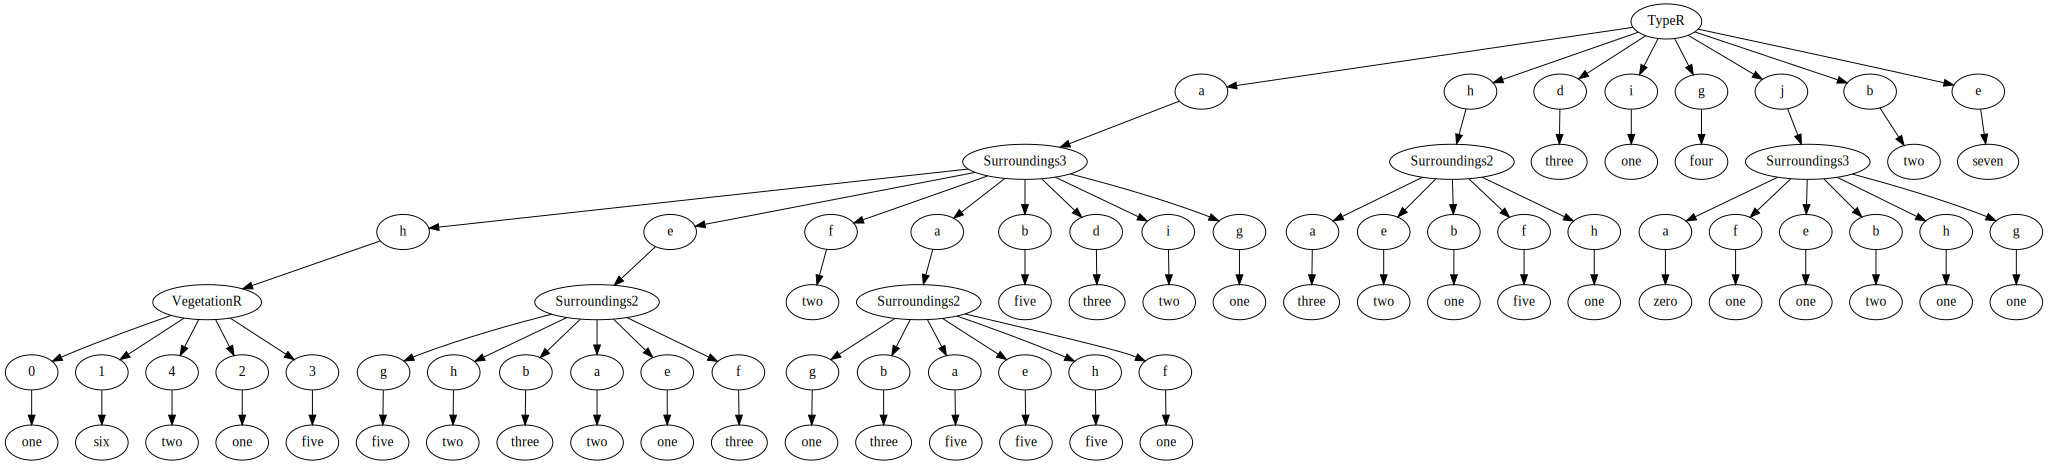

System entropy:  2.7780537123291715


In [11]:
#Calling DecisionTree constructor
tree1 = DecisionTree(data_descriptive, descriptive_features, data_label, "entropy")

#Passing pruning features for tree1
tree1.id3(0,15)

#Visualizing decision tree by Graphviz
dot1 = tree1.print_visualTree( render=True )
display(dot1)

print("System entropy: ", format(tree1.entropy))


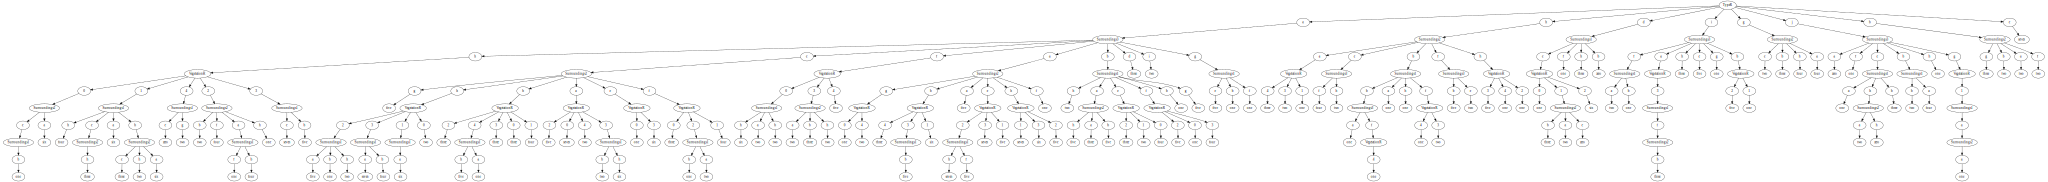

System entropy:  2.7780537123291715


In [12]:
#Calling DecisionTree constructor
tree2 = DecisionTree(data_descriptive, descriptive_features, data_label, "entropy")

#Passing pruning features for tree1
tree2.id3(0,1)

#Visualizing decision tree by Graphviz
dot2 = tree2.print_visualTree( render=True )
display(dot2)

print("System entropy: ", format(tree2.entropy))

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

**Explanation**: <br>
The best attribute for splitting the tree in the second round of ID3 is *Surroundings3*.

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

**Explanation**:<br>
Tree2 has significantly higher chance of overfitting. <br>
Since the minimum number of samples for this tree is set to 1, it will create decision rules for even 1 element subsets. <br>
The tree is too complex, it reduces its ability to generalize well on the unseen data.
On the other hand Tree1 has minimum number of samples set to 15, which means that decision rules will be created only for cases when certain rule appeared at least 15 times in the dataset. It ensures that we reflect actual rules, and not ones that could be generated based on some data errors. This tree is less complex, and should be better at generalizing.

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [13]:
#List of the columns to drop
cols_to_drop = ["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"]
#Copying sampled data
regression_sample_data = sampled_data.copy()
#Removing columns
regression_sample_data.drop(columns=cols_to_drop, inplace=True)
#saving the dataset
#regression_sample_data.to_csv('regression_sample_data.csv')

In [14]:
regression_sample_data.head()

,SurfaceR,TypeR,VegetationR,UseR,FishingR,AcessR,RoadDistanceR,BuildingR,PollutionR,ShoreR,Green frogs,Brown frogs
134,2400,a,0,3,4,75,1,1,0,natural,1,0
16,300,h,4,0,0,100,5,10,0,natural,0,1
167,22000,a,4,0,0,100,0,0,0,natural,1,1
104,8000,a,2,3,2,100,0,2,0,natural,1,1
35,1100,a,0,3,4,100,2,2,0,natural,0,1


   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [15]:
regression_sample_data.dtypes

SurfaceR          int64
TypeR            object
VegetationR       int64
UseR              int64
FishingR          int64
AcessR            int64
RoadDistanceR     int64
BuildingR         int64
PollutionR        int64
ShoreR           object
Green frogs       int64
Brown frogs       int64
dtype: object

**Explanation**:<br>
Logistic regression requires all features to be numeric. We need to change features "TypeR" and "ShoreR" into numerical values.<br>
To do so, we will use one-hot-encoding.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

**Explanation**:<br>
We implemented one-hot-encoding using get_dummies from the pandas library.<br>
This method works by creating a column for each unique value in a feature column that we want to transform. It then assigns 0 or 1 to the new columns. It is 1 if the given value that was in transformed feature and 0 to all others.

In [16]:
#getting dummy variables for TypeR and ShoreR
regression_sample_data_ohc = pd.get_dummies(regression_sample_data, columns=['TypeR', 'ShoreR'])
#Printing first two records
regression_sample_data_ohc.head(2)

#saving the dataset
#regression_sample_data_ohc.to_csv('regression_sample_data_ohc.csv')

,SurfaceR,VegetationR,UseR,FishingR,AcessR,RoadDistanceR,BuildingR,PollutionR,Green frogs,Brown frogs,TypeR_a,TypeR_b,TypeR_d,TypeR_e,TypeR_g,TypeR_h,TypeR_i,TypeR_j,ShoreR_concrete,ShoreR_natural
134,2400,0,3,4,75,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1
16,300,4,0,0,100,5,10,0,0,1,0,0,0,0,0,1,0,0,0,1


(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

Text(0.5, 1.0, 'Heatmap of the correlation between features')

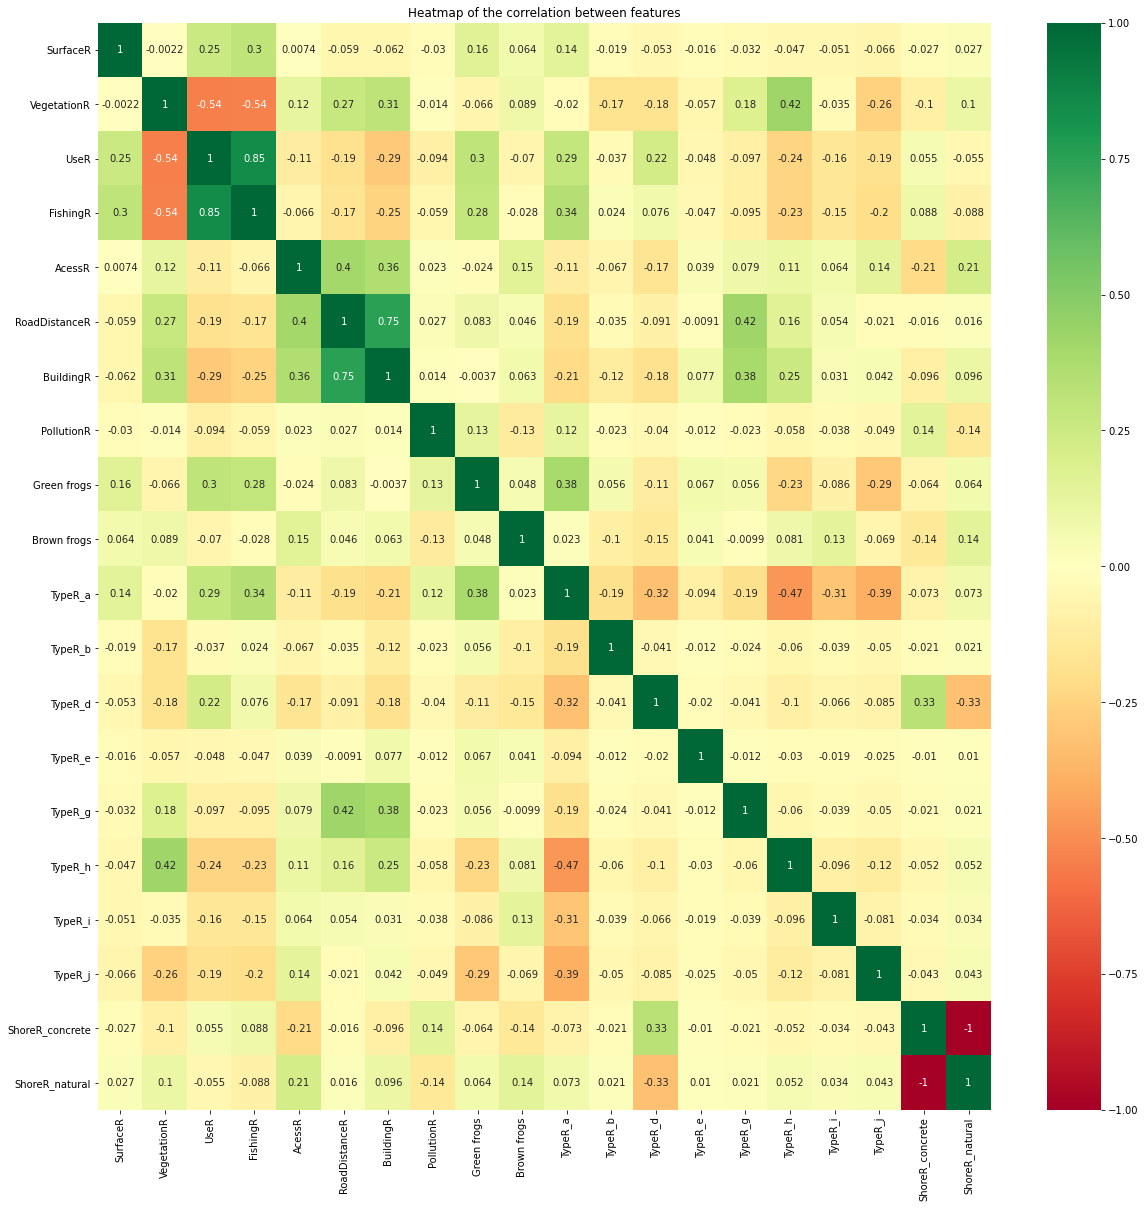

In [17]:
#get correlations of each features in dataset
corrmat = regression_sample_data_ohc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(regression_sample_data_ohc[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title("Heatmap of the correlation between features")
#saving the plot
#plt.savefig('correlation_heatmap.png')

**Explanation**: <br>
To select features for the regression, we decided to count the correlation between features and then plot them using heatmap to easily identify features with higly correlated to our target features. <br><br>
For *Green frogs*, four most promising features are: <br>
- *UseR*, *FishingR*, *SurfaceR* are easy to identify as features with the highest individual corellation to the target feature <br>
- *TypeR*, shows high positive and negative correlation on some of the dummy features, which we believe might have positive impact on the performance of the regression <br>

For *Brown frogs*, we can that the level of correlation is lower, when compared to *Green frogs*. We decided to choose following features: <br>
- *AcessR*, as the feature with highest positive correlation <br>
- *PollutionR*, as the feature with the highest negative correlation <br>
- *TypeR*, since other features show low correlation values, TypeR has some promising correlations for certain categories of *TypeR* <br>
- *VegetationR*, was chosen over *ShoreR* even tough it has lower correlation to the target feature, since *ShoreR* values has symmetric correlations. We also checked that empirically and found out that *VegetationR* returns slightly better results.

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [18]:
#List of the chosen features for green frog regression
chosen_features_green = ['UseR', 'FishingR','SurfaceR', 'TypeR_a', 'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g',
       'TypeR_h', 'TypeR_i', 'TypeR_j']

#defining the descriptive and target features
descriptiveFeatures_green = regression_sample_data_ohc[chosen_features_green] 
targetFeature_green = regression_sample_data_ohc['Green frogs'] 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(descriptiveFeatures_green, targetFeature_green)

targetFeature_green_pred = classifier.predict(descriptiveFeatures_green)

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

Coefficients: 
 [[ 4.89581021e-01 -1.88360755e-01  1.09850480e-04  6.09450814e-01
   4.36566844e-01 -7.06075288e-01  4.69368226e-01  6.77514580e-01
  -6.94617541e-01 -5.24134918e-02 -1.11394444e+00]]
Intercept: 
 [-0.3741503]


In [19]:
#List of the chosen features for green frog regression
chosen_features_brown = ['AcessR', 'PollutionR', 'TypeR_a', 'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g',
       'TypeR_h', 'TypeR_i', 'TypeR_j', 'VegetationR']

#defining the descriptive and target features
descriptiveFeatures_brown = regression_sample_data_ohc[chosen_features_brown] 
targetFeature_brown = regression_sample_data_ohc['Brown frogs']

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(descriptiveFeatures_brown, targetFeature_brown)

targetFeature_brown_pred = classifier.predict(descriptiveFeatures_brown)

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

Coefficients: 
 [[ 0.01422716 -0.71175507  0.14455841 -0.52162653 -0.61282397  0.16366441
  -0.15351186  0.33450149  0.94738161 -0.41411717  0.04552893]]
Intercept: 
 [-0.11197361]


   (e) For each of the two trained classifiers compute and print the confusion matrix.

In [20]:
from sklearn.metrics import confusion_matrix

#green
print("Confusion matrix for green frogs:")
print(confusion_matrix(y_true=targetFeature_green, y_pred=targetFeature_green_pred))

#brown
print("Confusion matrix for brown frogs:")
print(confusion_matrix(y_true=targetFeature_brown, y_pred=targetFeature_brown_pred))


Confusion matrix for green frogs:
[[42 31]
 [12 85]]
Confusion matrix for brown frogs:
[[  1  37]
 [  0 132]]


(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

**Explanation**: <br>
Accuracy of the green frog regression is equal to around 74.7%, while the brown regression is around 78.24% <br>
Even tough brown regression had higher accuracy, it can be result of the data distribution. Confusion matrix shows, that 169 times out of 170, regression predicted the same value, which means that it does not generalize well, and in 99.4% of cases chose the same category.<br>
That being said we think that the green frog regression classifier is better, as it appears that in generalizes well, even tough overall accuracy is lower. <br><br>
To get better results we could:
- Try to use more features
- Get more data, that will describe target features better


## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [21]:
#List of the columns to drop
cols_to_drop = ["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"]
#Copying sampled data
svm_sample_data = sampled_data.copy()
#Removing columns
svm_sample_data.drop(columns=cols_to_drop, inplace=True)
#saving the dataset
#svm_sample_data.to_csv('svm_sample_data.csv')

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

In [22]:
#getting dummy variables for TypeR and ShoreR
svm_sample_data_ohc = pd.get_dummies(svm_sample_data, columns=['TypeR', 'ShoreR'])
#Printing first two records
svm_sample_data_ohc.head(2)
#saving the dataset
#svm_sample_data_ohc.to_csv('svm_sample_data_ohc.csv')

,SurfaceR,VegetationR,UseR,FishingR,AcessR,RoadDistanceR,BuildingR,PollutionR,Green frogs,Brown frogs,TypeR_a,TypeR_b,TypeR_d,TypeR_e,TypeR_g,TypeR_h,TypeR_i,TypeR_j,ShoreR_concrete,ShoreR_natural
134,2400,0,3,4,75,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1
16,300,4,0,0,100,5,10,0,0,1,0,0,0,0,0,1,0,0,0,1


**Explanation:**<br>
SVM requires features to be numerical, in order to change categorical features into numerical, we use one hot encoding. <br>
We need to one hot encode features: *TypeR* and *ShoreR*.

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [23]:
import random
from sklearn.model_selection import train_test_split

#List of the chosen features for green frog regression
chosen_features_green = ['UseR', 'FishingR','SurfaceR', 'TypeR_a', 'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g',
       'TypeR_h', 'TypeR_i', 'TypeR_j']

#List of the chosen features for green frog regression
chosen_features_brown = ['AcessR', 'PollutionR', 'TypeR_a', 'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g',
       'TypeR_h', 'TypeR_i', 'TypeR_j', 'VegetationR']

X_train_green, X_test_green, y_train_green, y_test_green = train_test_split(svm_sample_data_ohc[chosen_features_green], svm_sample_data_ohc["Green frogs"], test_size=0.2, random_state=414760)
X_train_brown, X_test_brown, y_train_brown, y_test_brown = train_test_split(svm_sample_data_ohc[chosen_features_brown], svm_sample_data_ohc["Brown frogs"], test_size=0.2, random_state=414760)

print(X_train_green.head())

print(X_test_green.head())


     UseR  FishingR  SurfaceR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  \
63      0         0       100        1        0        0        0        0   
40      0         0     80000        0        0        0        0        0   
21      0         1      2500        1        0        0        0        0   
82      0         0      2000        1        0        0        0        0   
154     3         3       350        1        0        0        0        0   

     TypeR_h  TypeR_i  TypeR_j  
63         0        0        0  
40         1        0        0  
21         0        0        0  
82         0        0        0  
154        0        0        0  
     UseR  FishingR  SurfaceR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  \
134     3         4      2400        1        0        0        0        0   
112     0         0       500        1        0        0        0        0   
106     0         0       300        0        0        0        0        0   
58      3         2  

**Explanation:** <br>
We decided to use random sampling, because our data sample is quite small, and by using other methods (top, stratified or under-sampling) we could remove significant type of data items.<br>
We used 80% of data set for training and 20% for testing.

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [24]:
#Training the first model
model1 = SVC(C=1, kernel='linear', decision_function_shape ='ovo').fit(X_train_green, y_train_green)

#predicting values for the test set
targetFeature_green_predict1 = model1.predict(X_test_green)
print(targetFeature_green_predict1) 

[1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1]


In [25]:
#Training the second model
model2 = SVC(C=3, kernel='sigmoid', gamma = 'scale', decision_function_shape='ovo').fit(X_train_green, y_train_green)

#predicting values for the test set
targetFeature_green_predict2 = model2.predict(X_test_green)
print(targetFeature_green_predict2) 

[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1]


In [26]:
#Training the third model
model3 = SVC(C=2, kernel='poly', gamma = 'auto').fit(X_train_brown, y_train_brown)

#predicting values for the test set
targetFeature_brown_predict3 = model3.predict(X_test_brown)
print(targetFeature_brown_predict3 )#show the first 5 predicted values

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
#Training the fourth model
model4 = SVC(C=3, kernel='rbf', gamma = 'auto').fit(X_train_brown, y_train_brown)

#predicting values for the test set
targetFeature_brown_predict4 = model4.predict(X_test_brown)
print(targetFeature_brown_predict4) #show the first 5 predicted values

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

In [28]:
#Calculating accuracy and classification report for the first model
print('Accuracy: \n', model1.score(X_test_green,y_test_green))
print('Classification report: \n')
print(classification_report(y_test_green, targetFeature_green_predict1))  

Accuracy: 
 0.6470588235294118
Classification report: 

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.67      0.59      0.62        17

    accuracy                           0.65        34
   macro avg       0.65      0.65      0.65        34
weighted avg       0.65      0.65      0.65        34



In [29]:
#Calculating accuracy and classification report for the second model
print('Accuracy: \n', model2.score(X_test_green,y_test_green))
print('Classification report: \n')
print(classification_report(y_test_green, targetFeature_green_predict2)) 

Accuracy: 
 0.7058823529411765
Classification report: 

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.82      0.53      0.64        17

    accuracy                           0.71        34
   macro avg       0.74      0.71      0.70        34
weighted avg       0.74      0.71      0.70        34



In [30]:
#Calculating accuracy and classification report for the third model
print('Accuracy: \n', model3.score(X_test_brown,y_test_brown))
print('Classification report: \n')
print(classification_report(y_test_brown, targetFeature_brown_predict3)) 

Accuracy: 
 0.7058823529411765
Classification report: 

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.74      0.92      0.82        25

    accuracy                           0.71        34
   macro avg       0.54      0.52      0.49        34
weighted avg       0.63      0.71      0.65        34



In [31]:
#Calculating accuracy and classification report for the fourth model
print('Accuracy: \n', model4.score(X_test_brown,y_test_brown))
print('Classification report: \n')
print(classification_report(y_test_brown, targetFeature_brown_predict4))

Accuracy: 
 0.7352941176470589
Classification report: 

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.75      0.96      0.84        25

    accuracy                           0.74        34
   macro avg       0.62      0.54      0.51        34
weighted avg       0.68      0.74      0.67        34



   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

**Explanation:** <br>
Using different parameters for SVM, we can see that the results are very similar to each other. The accuracy varies insignificantly between cases. All models do much better classifing category 1, while doing (depending on the model) much worse on the category 0. This may indicate that, the feature selected in the earlier phase does not explain category 0 well enough.


## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

In [32]:
#Showing datatypes of the features
print("Types of the feautres in the cleaned data:\n",cleaned_data.dtypes)

#Showing number of unique categories for a given feature
print("Number of different categorical input in Surroundings1: ",cleaned_data["Surroundings1"].nunique())
print("Number of different categorical input in Surroundings2: ",cleaned_data["Surroundings2"].nunique())
print("Number of different categorical input in Surroundings3: ",cleaned_data["Surroundings3"].nunique())
print("Number of different categorical input in TypeR: ",cleaned_data["TypeR"].nunique())
print("Number of different categorical input in ShoreR: ",cleaned_data["ShoreR"].nunique())

print("Number of different categorical input in VegetationR: ",cleaned_data["VegetationR"].nunique())
print("Number of different categorical input in UseR: ",cleaned_data["UseR"].nunique())
print("Number of different categorical input in FishingR: ",cleaned_data["FishingR"].nunique())
print("Number of different categorical input in PollutionR: ",cleaned_data["PollutionR"].nunique())

#Calculating number of possible input patterns
print("\nNumber of possible input patterns is: ",7*7*8*8*2*5*3*5*3)

Types of the feautres in the cleaned data:
 ID                     int64
SurfaceR               int64
NumberR                int64
TypeR                 object
VegetationR            int64
Surroundings1         object
Surroundings2         object
Surroundings3         object
UseR                   int64
FishingR               int64
AcessR                 int64
RoadDistanceR          int64
BuildingR              int64
PollutionR             int64
ShoreR                object
Green frogs            int64
Brown frogs            int64
Common toad            int64
Fire-bellied toad      int64
Tree frog              int64
Common newt            int64
Great crested newt     int64
dtype: object
Number of different categorical input in Surroundings1:  7
Number of different categorical input in Surroundings2:  7
Number of different categorical input in Surroundings3:  8
Number of different categorical input in TypeR:  8
Number of different categorical input in ShoreR:  2
Number of different cate

**Explanation:**<br>
In the dataset we have 5 different categorical-nominal features:
- Surroundings1 (7 unique values)
- Surroundings2 (7 unique values)
- Surroundings3 (8 unique values)
- TypeR (8 unique values)
- ShoreR (2 unique values)<br>

On top of that we have 4 different categorical-ordinal features:
- VegetationR (5 unique values)
- UseR (3 unique values)
- FishingR (5 unique values)
- PollutionR (3 unique values)

That means that there are 1411200 possible input patterns.

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [33]:
#Selecting features
NN_data = sampled_data.loc[:, df.columns.isin(['NumberR', 'BuildingR', 'TypeR', 'Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt'])]
print(NN_data.head())

#saving the dataset
#NN_data.to_csv('NN_data.csv')

     NumberR TypeR  BuildingR  Green frogs  Brown frogs  Common toad  \
134        2     a          1            1            0            0   
16         1     h         10            0            1            1   
167        1     a          0            1            1            1   
104        1     a          2            1            1            0   
35         1     a          2            0            1            1   

     Fire-bellied toad  Tree frog  Common newt  Great crested newt  
134                  0          0            0                   0  
16                   0          1            0                   0  
167                  1          1            0                   0  
104                  0          0            0                   0  
35                   0          0            0                   0  


   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

In [34]:
#Encoding categorical features
NN_data_encoded = pd.get_dummies(NN_data, columns=['TypeR'])
print(NN_data_encoded.head())

#saving the dataset
#NN_data_encoded.to_csv('NN_data_encoded.csv')

data = NN_data_encoded

     NumberR  BuildingR  Green frogs  Brown frogs  Common toad  \
134        2          1            1            0            0   
16         1         10            0            1            1   
167        1          0            1            1            1   
104        1          2            1            1            0   
35         1          2            0            1            1   

     Fire-bellied toad  Tree frog  Common newt  Great crested newt  TypeR_a  \
134                  0          0            0                   0        1   
16                   0          1            0                   0        0   
167                  1          1            0                   0        1   
104                  0          0            0                   0        1   
35                   0          0            0                   0        1   

     TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  TypeR_i  TypeR_j  
134        0        0        0        0        0        0  

**Explanation:**<br> 
We needed to convert the feature "TypeR" because it contains categorical values.We sued Pandas' method get_dummies to convert categorical data into numerical.

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [35]:
#Listing of the used features and target features
X_NN = ['NumberR', 'BuildingR', 'TypeR_a' ,'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g', 'TypeR_h', 'TypeR_i', 'TypeR_j']
y_NN = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']

#Data selection
X_data = NN_data_encoded[X_NN]
y_data = NN_data_encoded[y_NN]

#Creating training and testing sets
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_data, y_data, test_size = 0.1, random_state=414759)


print(X_train_NN.head())
print(X_test_NN.head())


     NumberR  BuildingR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  \
34         1          2        1        0        0        0        0        0   
135        5          1        1        0        0        0        0        0   
76         1          1        1        0        0        0        0        0   
49         1          1        1        0        0        0        0        0   
137        1          0        1        0        0        0        0        0   

     TypeR_i  TypeR_j  
34         0        0  
135        0        0  
76         0        0  
49         0        0  
137        0        0  
     NumberR  BuildingR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  \
116        1          1        0        0        0        0        0        0   
41         1          5        0        0        0        0        0        1   
173        2          0        1        0        0        0        0        0   
52         1          2        1        0    

   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [36]:
#Creating classifier with non-linear activation function and default parameters
clf1 = MLPClassifier(activation='relu', hidden_layer_sizes=(100,), max_iter=200, alpha=0.0001,
                     solver='adam', verbose=True,  random_state=414759,tol=1e-4)

#Fitting classifier into the training data
clf1.fit(X_train_NN, y_train_NN)

#Predicting values for the testing set
y_pred1 = clf1.predict(X_test_NN)

Iteration 1, loss = 4.52847133
Iteration 2, loss = 4.50204723
Iteration 3, loss = 4.47685872
Iteration 4, loss = 4.45290554
Iteration 5, loss = 4.43028480
Iteration 6, loss = 4.40870936
Iteration 7, loss = 4.38817213
Iteration 8, loss = 4.36863953
Iteration 9, loss = 4.35006673
Iteration 10, loss = 4.33234095
Iteration 11, loss = 4.31546932
Iteration 12, loss = 4.29944335
Iteration 13, loss = 4.28420497
Iteration 14, loss = 4.26973515
Iteration 15, loss = 4.25598224
Iteration 16, loss = 4.24290091
Iteration 17, loss = 4.23045235
Iteration 18, loss = 4.21863911
Iteration 19, loss = 4.20744295
Iteration 20, loss = 4.19680962
Iteration 21, loss = 4.18669304
Iteration 22, loss = 4.17709234
Iteration 23, loss = 4.16791048
Iteration 24, loss = 4.15911692
Iteration 25, loss = 4.15075992
Iteration 26, loss = 4.14269592
Iteration 27, loss = 4.13495350
Iteration 28, loss = 4.12747986
Iteration 29, loss = 4.12025605
Iteration 30, loss = 4.11327323
Iteration 31, loss = 4.10647841
Iteration 32, los

In [37]:
#Printing accuracy of the model
print('The accuracy of the Multi-layer Perceptron is:', accuracy_score(y_test_NN, y_pred1))

The accuracy of the Multi-layer Perceptron is: 0.23529411764705882


In [38]:
#Creating classifier with linear activation function and default parameters
clf2 = MLPClassifier(activation='identity', hidden_layer_sizes=(100,), max_iter=200, alpha=0.0001,
                     solver='adam', verbose=True,  random_state=414759,tol=1e-4)

#Fitting classifier into the training data
clf2.fit(X_train_NN, y_train_NN)

#Predicting values for the testing set
y_pred2 = clf2.predict(X_test_NN)

Iteration 1, loss = 4.67575576
Iteration 2, loss = 4.61359895
Iteration 3, loss = 4.55603753
Iteration 4, loss = 4.50315275
Iteration 5, loss = 4.45497789
Iteration 6, loss = 4.41148768
Iteration 7, loss = 4.37259119
Iteration 8, loss = 4.33812894
Iteration 9, loss = 4.30787012
Iteration 10, loss = 4.28151336
Iteration 11, loss = 4.25869517
Iteration 12, loss = 4.23900670
Iteration 13, loss = 4.22201518
Iteration 14, loss = 4.20728620
Iteration 15, loss = 4.19440385
Iteration 16, loss = 4.18298681
Iteration 17, loss = 4.17269948
Iteration 18, loss = 4.16325782
Iteration 19, loss = 4.15443066
Iteration 20, loss = 4.14603734
Iteration 21, loss = 4.13794270
Iteration 22, loss = 4.13005052
Iteration 23, loss = 4.12229635
Iteration 24, loss = 4.11464034
Iteration 25, loss = 4.10706074
Iteration 26, loss = 4.09954814
Iteration 27, loss = 4.09210075
Iteration 28, loss = 4.08472060
Iteration 29, loss = 4.07741094
Iteration 30, loss = 4.07017487
Iteration 31, loss = 4.06301471
Iteration 32, los

In [39]:
#Printing accuracy of the model
print('The accuracy of the Multi-layer Perceptron is:', accuracy_score(y_test_NN, y_pred2))

The accuracy of the Multi-layer Perceptron is: 0.29411764705882354


**Explanation:**<br>
Model with *identity* function as activation function turned out to have better accuracy of around 29.41%. In comparison the other model, which had *relu* as activation function had accuracy of around 23.53%. *Identity* model seems to be better, when comparing their loss functions during training, *relu* model has slightly lower values, even thoug it does not show increased accuracy on the test data, this may indicate that this model overfits the training data. In this scenario *Identity* model seems to be better.

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [40]:
#Creating classifier with changed parameters
clf3 = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50, 150, 50), max_iter=2000, alpha=0.0001,
                     solver='sgd', verbose=True, random_state=414759, tol=1e-4)

#Fitting classifier into the training data
clf3.fit(X_train_NN, y_train_NN)

#Predicting values for the testing set
y_pred3 = clf3.predict(X_test_NN)

Iteration 1, loss = 4.94505095
Iteration 2, loss = 4.92408843
Iteration 3, loss = 4.89494011
Iteration 4, loss = 4.85917418
Iteration 5, loss = 4.81832329
Iteration 6, loss = 4.77384489
Iteration 7, loss = 4.72708879
Iteration 8, loss = 4.67927124
Iteration 9, loss = 4.63145581
Iteration 10, loss = 4.58454116
Iteration 11, loss = 4.53925610
Iteration 12, loss = 4.49616175
Iteration 13, loss = 4.45566027
Iteration 14, loss = 4.41800897
Iteration 15, loss = 4.38333847
Iteration 16, loss = 4.35167317
Iteration 17, loss = 4.32295259
Iteration 18, loss = 4.29705189
Iteration 19, loss = 4.27380089
Iteration 20, loss = 4.25300047
Iteration 21, loss = 4.23443639
Iteration 22, loss = 4.21789017
Iteration 23, loss = 4.20314736
Iteration 24, loss = 4.19000351
Iteration 25, loss = 4.17826802
Iteration 26, loss = 4.16776652
Iteration 27, loss = 4.15834188
Iteration 28, loss = 4.14985431
Iteration 29, loss = 4.14218083
Iteration 30, loss = 4.13521422
Iteration 31, loss = 4.12886174
Iteration 32, los

Iteration 272, loss = 3.78324631
Iteration 273, loss = 3.78259877
Iteration 274, loss = 3.78195727
Iteration 275, loss = 3.78132174
Iteration 276, loss = 3.78069210
Iteration 277, loss = 3.78006831
Iteration 278, loss = 3.77945028
Iteration 279, loss = 3.77883795
Iteration 280, loss = 3.77823126
Iteration 281, loss = 3.77763013
Iteration 282, loss = 3.77703451
Iteration 283, loss = 3.77644431
Iteration 284, loss = 3.77585948
Iteration 285, loss = 3.77527995
Iteration 286, loss = 3.77470565
Iteration 287, loss = 3.77413651
Iteration 288, loss = 3.77357248
Iteration 289, loss = 3.77301347
Iteration 290, loss = 3.77245943
Iteration 291, loss = 3.77191029
Iteration 292, loss = 3.77136598
Iteration 293, loss = 3.77082645
Iteration 294, loss = 3.77029162
Iteration 295, loss = 3.76976143
Iteration 296, loss = 3.76923582
Iteration 297, loss = 3.76871472
Iteration 298, loss = 3.76819807
Iteration 299, loss = 3.76768581
Iteration 300, loss = 3.76717787
Iteration 301, loss = 3.76667420
Iteration 

Iteration 528, loss = 3.69778974
Iteration 529, loss = 3.69756185
Iteration 530, loss = 3.69733424
Iteration 531, loss = 3.69710690
Iteration 532, loss = 3.69687984
Iteration 533, loss = 3.69665305
Iteration 534, loss = 3.69642653
Iteration 535, loss = 3.69620028
Iteration 536, loss = 3.69597430
Iteration 537, loss = 3.69574859
Iteration 538, loss = 3.69552315
Iteration 539, loss = 3.69529797
Iteration 540, loss = 3.69507305
Iteration 541, loss = 3.69484840
Iteration 542, loss = 3.69462401
Iteration 543, loss = 3.69439988
Iteration 544, loss = 3.69417601
Iteration 545, loss = 3.69395240
Iteration 546, loss = 3.69372905
Iteration 547, loss = 3.69350596
Iteration 548, loss = 3.69328312
Iteration 549, loss = 3.69306053
Iteration 550, loss = 3.69283820
Iteration 551, loss = 3.69261612
Iteration 552, loss = 3.69239430
Iteration 553, loss = 3.69217272
Iteration 554, loss = 3.69195139
Iteration 555, loss = 3.69173032
Iteration 556, loss = 3.69150949
Iteration 557, loss = 3.69128891
Iteration 

Iteration 793, loss = 3.64508561
Iteration 794, loss = 3.64491171
Iteration 795, loss = 3.64473797
Iteration 796, loss = 3.64456439
Iteration 797, loss = 3.64439098
Iteration 798, loss = 3.64421772
Iteration 799, loss = 3.64404463
Iteration 800, loss = 3.64387170
Iteration 801, loss = 3.64369893
Iteration 802, loss = 3.64352632
Iteration 803, loss = 3.64335387
Iteration 804, loss = 3.64318158
Iteration 805, loss = 3.64300945
Iteration 806, loss = 3.64283748
Iteration 807, loss = 3.64266567
Iteration 808, loss = 3.64249402
Iteration 809, loss = 3.64232252
Iteration 810, loss = 3.64215119
Iteration 811, loss = 3.64198001
Iteration 812, loss = 3.64180899
Iteration 813, loss = 3.64163813
Iteration 814, loss = 3.64146742
Iteration 815, loss = 3.64129687
Iteration 816, loss = 3.64112648
Iteration 817, loss = 3.64095624
Iteration 818, loss = 3.64078616
Iteration 819, loss = 3.64061623
Iteration 820, loss = 3.64044646
Iteration 821, loss = 3.64027684
Iteration 822, loss = 3.64010738
Iteration 

Iteration 1063, loss = 3.60300525
Iteration 1064, loss = 3.60286377
Iteration 1065, loss = 3.60272237
Iteration 1066, loss = 3.60258105
Iteration 1067, loss = 3.60243981
Iteration 1068, loss = 3.60229865
Iteration 1069, loss = 3.60215757
Iteration 1070, loss = 3.60201656
Iteration 1071, loss = 3.60187564
Iteration 1072, loss = 3.60173480
Iteration 1073, loss = 3.60159403
Iteration 1074, loss = 3.60145334
Iteration 1075, loss = 3.60131273
Iteration 1076, loss = 3.60117219
Iteration 1077, loss = 3.60103174
Iteration 1078, loss = 3.60089136
Iteration 1079, loss = 3.60075106
Iteration 1080, loss = 3.60061083
Iteration 1081, loss = 3.60047068
Iteration 1082, loss = 3.60033061
Iteration 1083, loss = 3.60019061
Iteration 1084, loss = 3.60005069
Iteration 1085, loss = 3.59991084
Iteration 1086, loss = 3.59977107
Iteration 1087, loss = 3.59963137
Iteration 1088, loss = 3.59949175
Iteration 1089, loss = 3.59935220
Iteration 1090, loss = 3.59921273
Iteration 1091, loss = 3.59907333
Iteration 1092

Iteration 1341, loss = 3.56603324
Iteration 1342, loss = 3.56590662
Iteration 1343, loss = 3.56578004
Iteration 1344, loss = 3.56565349
Iteration 1345, loss = 3.56552697
Iteration 1346, loss = 3.56540049
Iteration 1347, loss = 3.56527403
Iteration 1348, loss = 3.56514761
Iteration 1349, loss = 3.56502123
Iteration 1350, loss = 3.56489487
Iteration 1351, loss = 3.56476855
Iteration 1352, loss = 3.56464226
Iteration 1353, loss = 3.56451600
Iteration 1354, loss = 3.56438978
Iteration 1355, loss = 3.56426358
Iteration 1356, loss = 3.56413742
Iteration 1357, loss = 3.56401129
Iteration 1358, loss = 3.56388519
Iteration 1359, loss = 3.56375913
Iteration 1360, loss = 3.56363309
Iteration 1361, loss = 3.56350709
Iteration 1362, loss = 3.56338111
Iteration 1363, loss = 3.56325517
Iteration 1364, loss = 3.56312926
Iteration 1365, loss = 3.56300338
Iteration 1366, loss = 3.56287753
Iteration 1367, loss = 3.56275172
Iteration 1368, loss = 3.56262593
Iteration 1369, loss = 3.56250017
Iteration 1370

Iteration 1621, loss = 3.53160140
Iteration 1622, loss = 3.53148143
Iteration 1623, loss = 3.53136149
Iteration 1624, loss = 3.53124156
Iteration 1625, loss = 3.53112165
Iteration 1626, loss = 3.53100176
Iteration 1627, loss = 3.53088189
Iteration 1628, loss = 3.53076204
Iteration 1629, loss = 3.53064220
Iteration 1630, loss = 3.53052239
Iteration 1631, loss = 3.53040259
Iteration 1632, loss = 3.53028282
Iteration 1633, loss = 3.53016306
Iteration 1634, loss = 3.53004332
Iteration 1635, loss = 3.52992359
Iteration 1636, loss = 3.52980389
Iteration 1637, loss = 3.52968421
Iteration 1638, loss = 3.52956454
Iteration 1639, loss = 3.52944490
Iteration 1640, loss = 3.52932527
Iteration 1641, loss = 3.52920566
Iteration 1642, loss = 3.52908607
Iteration 1643, loss = 3.52896650
Iteration 1644, loss = 3.52884694
Iteration 1645, loss = 3.52872741
Iteration 1646, loss = 3.52860789
Iteration 1647, loss = 3.52848839
Iteration 1648, loss = 3.52836892
Iteration 1649, loss = 3.52824946
Iteration 1650

Iteration 1886, loss = 3.50047964
Iteration 1887, loss = 3.50036489
Iteration 1888, loss = 3.50025017
Iteration 1889, loss = 3.50013546
Iteration 1890, loss = 3.50002078
Iteration 1891, loss = 3.49990612
Iteration 1892, loss = 3.49979148
Iteration 1893, loss = 3.49967686
Iteration 1894, loss = 3.49956227
Iteration 1895, loss = 3.49944769
Iteration 1896, loss = 3.49933314
Iteration 1897, loss = 3.49921861
Iteration 1898, loss = 3.49910411
Iteration 1899, loss = 3.49898962
Iteration 1900, loss = 3.49887516
Iteration 1901, loss = 3.49876072
Iteration 1902, loss = 3.49864630
Iteration 1903, loss = 3.49853190
Iteration 1904, loss = 3.49841753
Iteration 1905, loss = 3.49830318
Iteration 1906, loss = 3.49818885
Iteration 1907, loss = 3.49807454
Iteration 1908, loss = 3.49796026
Iteration 1909, loss = 3.49784599
Iteration 1910, loss = 3.49773175
Iteration 1911, loss = 3.49761753
Iteration 1912, loss = 3.49750334
Iteration 1913, loss = 3.49738917
Iteration 1914, loss = 3.49727501
Iteration 1915

In [41]:
#Printing accuracy of the model
print('The accuracy of the Multi-layer Perceptron is:', accuracy_score(y_test_NN, y_pred3))

The accuracy of the Multi-layer Perceptron is: 0.23529411764705882


In [42]:
#Creating classifier with changed parameters
clf4 = MLPClassifier(activation='identity', hidden_layer_sizes=(100, 100, 100,), max_iter=20000, alpha=0.0001,
                     solver='adam', verbose=True, random_state=414759, tol=1e-6)

#Fitting classifier into the training data
clf4.fit(X_train_NN, y_train_NN)

#Predicting values for the testing set
y_pred4 = clf4.predict(X_test_NN)

Iteration 1, loss = 5.38817394
Iteration 2, loss = 4.89958065
Iteration 3, loss = 4.56455104
Iteration 4, loss = 4.35198351
Iteration 5, loss = 4.22973589
Iteration 6, loss = 4.17250566
Iteration 7, loss = 4.15203567
Iteration 8, loss = 4.14549778
Iteration 9, loss = 4.13977673
Iteration 10, loss = 4.12985752
Iteration 11, loss = 4.11488436
Iteration 12, loss = 4.09463554
Iteration 13, loss = 4.06880824
Iteration 14, loss = 4.03814963
Iteration 15, loss = 4.00494428
Iteration 16, loss = 3.97214817
Iteration 17, loss = 3.94210808
Iteration 18, loss = 3.91598520
Iteration 19, loss = 3.89416398
Iteration 20, loss = 3.87684942
Iteration 21, loss = 3.86397058
Iteration 22, loss = 3.85465748
Iteration 23, loss = 3.84729935
Iteration 24, loss = 3.84037469
Iteration 25, loss = 3.83313412
Iteration 26, loss = 3.82545138
Iteration 27, loss = 3.81726675
Iteration 28, loss = 3.80847060
Iteration 29, loss = 3.79927740
Iteration 30, loss = 3.79035045
Iteration 31, loss = 3.78239970
Iteration 32, los

Iteration 288, loss = 3.65235785
Iteration 289, loss = 3.65234939
Iteration 290, loss = 3.65234104
Iteration 291, loss = 3.65233278
Iteration 292, loss = 3.65232462
Iteration 293, loss = 3.65231656
Iteration 294, loss = 3.65230858
Iteration 295, loss = 3.65230071
Iteration 296, loss = 3.65229292
Iteration 297, loss = 3.65228522
Iteration 298, loss = 3.65227761
Iteration 299, loss = 3.65227008
Iteration 300, loss = 3.65226264
Iteration 301, loss = 3.65225528
Iteration 302, loss = 3.65224801
Iteration 303, loss = 3.65224082
Iteration 304, loss = 3.65223370
Iteration 305, loss = 3.65222667
Iteration 306, loss = 3.65221971
Iteration 307, loss = 3.65221283
Iteration 308, loss = 3.65220603
Iteration 309, loss = 3.65219930
Iteration 310, loss = 3.65219264
Iteration 311, loss = 3.65218605
Iteration 312, loss = 3.65217954
Iteration 313, loss = 3.65217309
Iteration 314, loss = 3.65216672
Iteration 315, loss = 3.65216041
Iteration 316, loss = 3.65215417
Iteration 317, loss = 3.65214799
Iteration 

Iteration 566, loss = 3.65151663
Iteration 567, loss = 3.65151566
Iteration 568, loss = 3.65151470
Iteration 569, loss = 3.65151375
Iteration 570, loss = 3.65151280
Iteration 571, loss = 3.65151186
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


In [43]:
#Printing accuracy of the model
print('The accuracy of the Multi-layer Perceptron is:', accuracy_score(y_test_NN, y_pred4))

The accuracy of the Multi-layer Perceptron is: 0.29411764705882354


 Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

**Explanation:**<br>
We experimented with different parameters, and we were not able to improve our accuracy. Even tough we had some interesting observations:
- Surprisingly the best accuracy we get with identity activation function
- Logistic activation function does not result in good accuracy, it seems that it gets stuck in the local optimum of the loss function, and cannot escape it, even when we decrease tolerance and increase n_iter_no_change
- For tanh and relu activation functions at the end we end up with smaller value of loss function, compared to the linear model. It may indicate that models with non-linear activation functions overfit the training data, and do not perform well on the testing dataset.
- When we use Adam solver with non-linear activation function, the loss function converges quickly to low values, but accuracy decreases drastically. (data overfitting)
- increasing the number of hidden layers and changing the topology of the network has rather positive influance on the accuracy

At the end model3 has *tanh* activation function, with additional hidden layers (100, 50, 150, 50). We also increased the number of iteration to 2000, from 200, and changed the optimization solver to stochastic gradient descent (sgd). <br>

In model4, we stayed with the *identity* activation function and adam solver, as it showed the best accuracy. Changing the neural network topology did not have an impact on the accuracy. We also tried to change maximum iteration, and tolerance, however in this case the model quickly converges to the optimum of the loss function and stays there.

## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [44]:
#  Split the data into a training set and a test set
X_NN = ['NumberR', 'BuildingR', 'TypeR_a' ,'TypeR_b', 'TypeR_d', 'TypeR_e', 'TypeR_g', 'TypeR_h', 'TypeR_i', 'TypeR_j']
y_NN = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']

X_data = NN_data_encoded[X_NN]
y_data = NN_data_encoded[y_NN]

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_data, y_data, test_size = 0.1, random_state=414759)

#Creating cross validation sets using KFold method
kfold3 = model_selection.KFold(n_splits=3, random_state=414759)
kfold4 = model_selection.KFold(n_splits=3, random_state=414759)

#Initializing variables
model3_data_indexes = []
model4_data_indexes = []

#creating array that stores indexes of train and test data for each fold of cross validation for model3
for train_index, test_index in kfold3.split(X_data):
    model3_data_indexes.append((train_index, test_index))
#creating array that stores indexes of train and test data for each fold of cross validation for model4
for train_index, test_index in kfold4.split(X_data):
    model4_data_indexes.append((train_index, test_index))
  


- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [45]:
#setting up variable that will store confusion matrices
confusion_matrices_train3 = []

#We iterate over datasets for each fold
for dataset in model3_data_indexes:
    #From the list of all indexes we get only the ones for a given fold
    train_indexes=dataset[0]
    test_indexes=dataset[1]

    #We fit the model using data with indexes for a given fold
    clf3.fit(X_data.iloc[train_indexes], y_data.iloc[train_indexes])
    #Predict values on the training data
    y_pred3 = clf3.predict(X_data.iloc[train_indexes])
    
    #calculating multilabel_confusion_matrix
    cm = multilabel_confusion_matrix(y_data.iloc[train_indexes], y_pred3)
    
    #setting up variable for cell-by-cell summation
    res = np.matrix([[0, 0], [0, 0]])  
    
    #cell-by-cell summation of the confusion matrices
    for item in cm:
        single_cm = np.matrix(item)
        res += single_cm
    
    #adding summed confussion_matrix to the variable with the results
    confusion_matrices_train3.append(res)


Iteration 1, loss = 4.97430284
Iteration 2, loss = 4.94988089
Iteration 3, loss = 4.91593219
Iteration 4, loss = 4.87429500
Iteration 5, loss = 4.82676940
Iteration 6, loss = 4.77506967
Iteration 7, loss = 4.72078416
Iteration 8, loss = 4.66534235
Iteration 9, loss = 4.60998984
Iteration 10, loss = 4.55577232
Iteration 11, loss = 4.50352902
Iteration 12, loss = 4.45389585
Iteration 13, loss = 4.40731728
Iteration 14, loss = 4.36406533
Iteration 15, loss = 4.32426360
Iteration 16, loss = 4.28791377
Iteration 17, loss = 4.25492260
Iteration 18, loss = 4.22512733
Iteration 19, loss = 4.19831835
Iteration 20, loss = 4.17425844
Iteration 21, loss = 4.15269814
Iteration 22, loss = 4.13338762
Iteration 23, loss = 4.11608520
Iteration 24, loss = 4.10056323
Iteration 25, loss = 4.08661160
Iteration 26, loss = 4.07403963
Iteration 27, loss = 4.06267652
Iteration 28, loss = 4.05237105
Iteration 29, loss = 4.04299050
Iteration 30, loss = 4.03441928
Iteration 31, loss = 4.02655727
Iteration 32, los

Iteration 298, loss = 3.55430782
Iteration 299, loss = 3.55363047
Iteration 300, loss = 3.55295834
Iteration 301, loss = 3.55229135
Iteration 302, loss = 3.55162942
Iteration 303, loss = 3.55097245
Iteration 304, loss = 3.55032035
Iteration 305, loss = 3.54967306
Iteration 306, loss = 3.54903047
Iteration 307, loss = 3.54839252
Iteration 308, loss = 3.54775911
Iteration 309, loss = 3.54713017
Iteration 310, loss = 3.54650562
Iteration 311, loss = 3.54588538
Iteration 312, loss = 3.54526937
Iteration 313, loss = 3.54465752
Iteration 314, loss = 3.54404976
Iteration 315, loss = 3.54344599
Iteration 316, loss = 3.54284617
Iteration 317, loss = 3.54225020
Iteration 318, loss = 3.54165803
Iteration 319, loss = 3.54106958
Iteration 320, loss = 3.54048478
Iteration 321, loss = 3.53990356
Iteration 322, loss = 3.53932586
Iteration 323, loss = 3.53875161
Iteration 324, loss = 3.53818075
Iteration 325, loss = 3.53761322
Iteration 326, loss = 3.53704894
Iteration 327, loss = 3.53648785
Iteration 

Iteration 596, loss = 3.41646657
Iteration 597, loss = 3.41601825
Iteration 598, loss = 3.41556965
Iteration 599, loss = 3.41512076
Iteration 600, loss = 3.41467159
Iteration 601, loss = 3.41422213
Iteration 602, loss = 3.41377238
Iteration 603, loss = 3.41332234
Iteration 604, loss = 3.41287202
Iteration 605, loss = 3.41242141
Iteration 606, loss = 3.41197051
Iteration 607, loss = 3.41151932
Iteration 608, loss = 3.41106785
Iteration 609, loss = 3.41061609
Iteration 610, loss = 3.41016403
Iteration 611, loss = 3.40971169
Iteration 612, loss = 3.40925907
Iteration 613, loss = 3.40880615
Iteration 614, loss = 3.40835294
Iteration 615, loss = 3.40789945
Iteration 616, loss = 3.40744567
Iteration 617, loss = 3.40699160
Iteration 618, loss = 3.40653724
Iteration 619, loss = 3.40608260
Iteration 620, loss = 3.40562766
Iteration 621, loss = 3.40517244
Iteration 622, loss = 3.40471693
Iteration 623, loss = 3.40426113
Iteration 624, loss = 3.40380505
Iteration 625, loss = 3.40334868
Iteration 

Iteration 893, loss = 3.27536048
Iteration 894, loss = 3.27488955
Iteration 895, loss = 3.27441891
Iteration 896, loss = 3.27394856
Iteration 897, loss = 3.27347852
Iteration 898, loss = 3.27300877
Iteration 899, loss = 3.27253932
Iteration 900, loss = 3.27207017
Iteration 901, loss = 3.27160134
Iteration 902, loss = 3.27113281
Iteration 903, loss = 3.27066459
Iteration 904, loss = 3.27019669
Iteration 905, loss = 3.26972910
Iteration 906, loss = 3.26926183
Iteration 907, loss = 3.26879488
Iteration 908, loss = 3.26832826
Iteration 909, loss = 3.26786196
Iteration 910, loss = 3.26739599
Iteration 911, loss = 3.26693035
Iteration 912, loss = 3.26646504
Iteration 913, loss = 3.26600007
Iteration 914, loss = 3.26553544
Iteration 915, loss = 3.26507114
Iteration 916, loss = 3.26460719
Iteration 917, loss = 3.26414358
Iteration 918, loss = 3.26368032
Iteration 919, loss = 3.26321740
Iteration 920, loss = 3.26275484
Iteration 921, loss = 3.26229263
Iteration 922, loss = 3.26183078
Iteration 

Iteration 1174, loss = 3.16005989
Iteration 1175, loss = 3.15971733
Iteration 1176, loss = 3.15937522
Iteration 1177, loss = 3.15903356
Iteration 1178, loss = 3.15869234
Iteration 1179, loss = 3.15835157
Iteration 1180, loss = 3.15801124
Iteration 1181, loss = 3.15767136
Iteration 1182, loss = 3.15733191
Iteration 1183, loss = 3.15699291
Iteration 1184, loss = 3.15665435
Iteration 1185, loss = 3.15631623
Iteration 1186, loss = 3.15597855
Iteration 1187, loss = 3.15564130
Iteration 1188, loss = 3.15530450
Iteration 1189, loss = 3.15496813
Iteration 1190, loss = 3.15463219
Iteration 1191, loss = 3.15429669
Iteration 1192, loss = 3.15396162
Iteration 1193, loss = 3.15362698
Iteration 1194, loss = 3.15329277
Iteration 1195, loss = 3.15295899
Iteration 1196, loss = 3.15262565
Iteration 1197, loss = 3.15229273
Iteration 1198, loss = 3.15196024
Iteration 1199, loss = 3.15162817
Iteration 1200, loss = 3.15129653
Iteration 1201, loss = 3.15096532
Iteration 1202, loss = 3.15063452
Iteration 1203

Iteration 1470, loss = 3.07435812
Iteration 1471, loss = 3.07411045
Iteration 1472, loss = 3.07386299
Iteration 1473, loss = 3.07361575
Iteration 1474, loss = 3.07336873
Iteration 1475, loss = 3.07312192
Iteration 1476, loss = 3.07287533
Iteration 1477, loss = 3.07262895
Iteration 1478, loss = 3.07238279
Iteration 1479, loss = 3.07213684
Iteration 1480, loss = 3.07189111
Iteration 1481, loss = 3.07164559
Iteration 1482, loss = 3.07140028
Iteration 1483, loss = 3.07115518
Iteration 1484, loss = 3.07091030
Iteration 1485, loss = 3.07066562
Iteration 1486, loss = 3.07042116
Iteration 1487, loss = 3.07017690
Iteration 1488, loss = 3.06993286
Iteration 1489, loss = 3.06968902
Iteration 1490, loss = 3.06944540
Iteration 1491, loss = 3.06920198
Iteration 1492, loss = 3.06895876
Iteration 1493, loss = 3.06871576
Iteration 1494, loss = 3.06847296
Iteration 1495, loss = 3.06823037
Iteration 1496, loss = 3.06798798
Iteration 1497, loss = 3.06774580
Iteration 1498, loss = 3.06750382
Iteration 1499

Iteration 1717, loss = 3.01865013
Iteration 1718, loss = 3.01844300
Iteration 1719, loss = 3.01823601
Iteration 1720, loss = 3.01802913
Iteration 1721, loss = 3.01782239
Iteration 1722, loss = 3.01761576
Iteration 1723, loss = 3.01740927
Iteration 1724, loss = 3.01720290
Iteration 1725, loss = 3.01699665
Iteration 1726, loss = 3.01679053
Iteration 1727, loss = 3.01658453
Iteration 1728, loss = 3.01637866
Iteration 1729, loss = 3.01617291
Iteration 1730, loss = 3.01596729
Iteration 1731, loss = 3.01576179
Iteration 1732, loss = 3.01555642
Iteration 1733, loss = 3.01535117
Iteration 1734, loss = 3.01514604
Iteration 1735, loss = 3.01494104
Iteration 1736, loss = 3.01473616
Iteration 1737, loss = 3.01453140
Iteration 1738, loss = 3.01432677
Iteration 1739, loss = 3.01412226
Iteration 1740, loss = 3.01391788
Iteration 1741, loss = 3.01371362
Iteration 1742, loss = 3.01350948
Iteration 1743, loss = 3.01330547
Iteration 1744, loss = 3.01310158
Iteration 1745, loss = 3.01289781
Iteration 1746

Iteration 2, loss = 4.91550823
Iteration 3, loss = 4.88578824
Iteration 4, loss = 4.84939718
Iteration 5, loss = 4.80793722
Iteration 6, loss = 4.76292727
Iteration 7, loss = 4.71576705
Iteration 8, loss = 4.66770928
Iteration 9, loss = 4.61984008
Iteration 10, loss = 4.57306754
Iteration 11, loss = 4.52811847
Iteration 12, loss = 4.48554279
Iteration 13, loss = 4.44572466
Iteration 14, loss = 4.40889894
Iteration 15, loss = 4.37517145
Iteration 16, loss = 4.34454112
Iteration 17, loss = 4.31692258
Iteration 18, loss = 4.29216770
Iteration 19, loss = 4.27008511
Iteration 20, loss = 4.25045703
Iteration 21, loss = 4.23305317
Iteration 22, loss = 4.21764162
Iteration 23, loss = 4.20399710
Iteration 24, loss = 4.19190663
Iteration 25, loss = 4.18117333
Iteration 26, loss = 4.17161844
Iteration 27, loss = 4.16308218
Iteration 28, loss = 4.15542359
Iteration 29, loss = 4.14851975
Iteration 30, loss = 4.14226452
Iteration 31, loss = 4.13656706
Iteration 32, loss = 4.13135019
Iteration 33, lo

Iteration 310, loss = 3.78709116
Iteration 311, loss = 3.78651642
Iteration 312, loss = 3.78594446
Iteration 313, loss = 3.78537525
Iteration 314, loss = 3.78480873
Iteration 315, loss = 3.78424486
Iteration 316, loss = 3.78368361
Iteration 317, loss = 3.78312493
Iteration 318, loss = 3.78256878
Iteration 319, loss = 3.78201513
Iteration 320, loss = 3.78146393
Iteration 321, loss = 3.78091514
Iteration 322, loss = 3.78036873
Iteration 323, loss = 3.77982465
Iteration 324, loss = 3.77928288
Iteration 325, loss = 3.77874337
Iteration 326, loss = 3.77820609
Iteration 327, loss = 3.77767100
Iteration 328, loss = 3.77713806
Iteration 329, loss = 3.77660725
Iteration 330, loss = 3.77607852
Iteration 331, loss = 3.77555185
Iteration 332, loss = 3.77502719
Iteration 333, loss = 3.77450452
Iteration 334, loss = 3.77398381
Iteration 335, loss = 3.77346502
Iteration 336, loss = 3.77294812
Iteration 337, loss = 3.77243308
Iteration 338, loss = 3.77191988
Iteration 339, loss = 3.77140847
Iteration 

Iteration 629, loss = 3.65388236
Iteration 630, loss = 3.65354081
Iteration 631, loss = 3.65319964
Iteration 632, loss = 3.65285885
Iteration 633, loss = 3.65251844
Iteration 634, loss = 3.65217840
Iteration 635, loss = 3.65183874
Iteration 636, loss = 3.65149945
Iteration 637, loss = 3.65116055
Iteration 638, loss = 3.65082201
Iteration 639, loss = 3.65048385
Iteration 640, loss = 3.65014607
Iteration 641, loss = 3.64980866
Iteration 642, loss = 3.64947162
Iteration 643, loss = 3.64913496
Iteration 644, loss = 3.64879866
Iteration 645, loss = 3.64846274
Iteration 646, loss = 3.64812719
Iteration 647, loss = 3.64779201
Iteration 648, loss = 3.64745719
Iteration 649, loss = 3.64712275
Iteration 650, loss = 3.64678867
Iteration 651, loss = 3.64645497
Iteration 652, loss = 3.64612162
Iteration 653, loss = 3.64578865
Iteration 654, loss = 3.64545604
Iteration 655, loss = 3.64512379
Iteration 656, loss = 3.64479191
Iteration 657, loss = 3.64446040
Iteration 658, loss = 3.64412924
Iteration 

Iteration 922, loss = 3.56735417
Iteration 923, loss = 3.56709730
Iteration 924, loss = 3.56684064
Iteration 925, loss = 3.56658420
Iteration 926, loss = 3.56632799
Iteration 927, loss = 3.56607199
Iteration 928, loss = 3.56581621
Iteration 929, loss = 3.56556065
Iteration 930, loss = 3.56530531
Iteration 931, loss = 3.56505019
Iteration 932, loss = 3.56479529
Iteration 933, loss = 3.56454060
Iteration 934, loss = 3.56428613
Iteration 935, loss = 3.56403188
Iteration 936, loss = 3.56377785
Iteration 937, loss = 3.56352403
Iteration 938, loss = 3.56327043
Iteration 939, loss = 3.56301704
Iteration 940, loss = 3.56276387
Iteration 941, loss = 3.56251092
Iteration 942, loss = 3.56225818
Iteration 943, loss = 3.56200565
Iteration 944, loss = 3.56175334
Iteration 945, loss = 3.56150124
Iteration 946, loss = 3.56124936
Iteration 947, loss = 3.56099769
Iteration 948, loss = 3.56074624
Iteration 949, loss = 3.56049499
Iteration 950, loss = 3.56024397
Iteration 951, loss = 3.55999315
Iteration 

Iteration 1202, loss = 3.50305713
Iteration 1203, loss = 3.50285152
Iteration 1204, loss = 3.50264606
Iteration 1205, loss = 3.50244075
Iteration 1206, loss = 3.50223558
Iteration 1207, loss = 3.50203055
Iteration 1208, loss = 3.50182567
Iteration 1209, loss = 3.50162094
Iteration 1210, loss = 3.50141635
Iteration 1211, loss = 3.50121191
Iteration 1212, loss = 3.50100761
Iteration 1213, loss = 3.50080345
Iteration 1214, loss = 3.50059944
Iteration 1215, loss = 3.50039558
Iteration 1216, loss = 3.50019185
Iteration 1217, loss = 3.49998827
Iteration 1218, loss = 3.49978483
Iteration 1219, loss = 3.49958154
Iteration 1220, loss = 3.49937839
Iteration 1221, loss = 3.49917538
Iteration 1222, loss = 3.49897251
Iteration 1223, loss = 3.49876978
Iteration 1224, loss = 3.49856720
Iteration 1225, loss = 3.49836475
Iteration 1226, loss = 3.49816245
Iteration 1227, loss = 3.49796028
Iteration 1228, loss = 3.49775826
Iteration 1229, loss = 3.49755638
Iteration 1230, loss = 3.49735463
Iteration 1231

Iteration 1505, loss = 3.44625170
Iteration 1506, loss = 3.44607849
Iteration 1507, loss = 3.44590533
Iteration 1508, loss = 3.44573225
Iteration 1509, loss = 3.44555924
Iteration 1510, loss = 3.44538629
Iteration 1511, loss = 3.44521341
Iteration 1512, loss = 3.44504060
Iteration 1513, loss = 3.44486786
Iteration 1514, loss = 3.44469518
Iteration 1515, loss = 3.44452257
Iteration 1516, loss = 3.44435002
Iteration 1517, loss = 3.44417755
Iteration 1518, loss = 3.44400513
Iteration 1519, loss = 3.44383279
Iteration 1520, loss = 3.44366051
Iteration 1521, loss = 3.44348829
Iteration 1522, loss = 3.44331614
Iteration 1523, loss = 3.44314406
Iteration 1524, loss = 3.44297204
Iteration 1525, loss = 3.44280008
Iteration 1526, loss = 3.44262819
Iteration 1527, loss = 3.44245636
Iteration 1528, loss = 3.44228460
Iteration 1529, loss = 3.44211290
Iteration 1530, loss = 3.44194127
Iteration 1531, loss = 3.44176969
Iteration 1532, loss = 3.44159818
Iteration 1533, loss = 3.44142673
Iteration 1534

Iteration 1799, loss = 3.39745587
Iteration 1800, loss = 3.39729484
Iteration 1801, loss = 3.39713384
Iteration 1802, loss = 3.39697286
Iteration 1803, loss = 3.39681190
Iteration 1804, loss = 3.39665095
Iteration 1805, loss = 3.39649003
Iteration 1806, loss = 3.39632913
Iteration 1807, loss = 3.39616825
Iteration 1808, loss = 3.39600739
Iteration 1809, loss = 3.39584655
Iteration 1810, loss = 3.39568573
Iteration 1811, loss = 3.39552493
Iteration 1812, loss = 3.39536415
Iteration 1813, loss = 3.39520339
Iteration 1814, loss = 3.39504265
Iteration 1815, loss = 3.39488193
Iteration 1816, loss = 3.39472122
Iteration 1817, loss = 3.39456054
Iteration 1818, loss = 3.39439988
Iteration 1819, loss = 3.39423923
Iteration 1820, loss = 3.39407861
Iteration 1821, loss = 3.39391800
Iteration 1822, loss = 3.39375741
Iteration 1823, loss = 3.39359684
Iteration 1824, loss = 3.39343629
Iteration 1825, loss = 3.39327576
Iteration 1826, loss = 3.39311525
Iteration 1827, loss = 3.39295475
Iteration 1828

Iteration 94, loss = 4.06982770
Iteration 95, loss = 4.06849464
Iteration 96, loss = 4.06716403
Iteration 97, loss = 4.06583582
Iteration 98, loss = 4.06450993
Iteration 99, loss = 4.06318628
Iteration 100, loss = 4.06186482
Iteration 101, loss = 4.06054548
Iteration 102, loss = 4.05922820
Iteration 103, loss = 4.05791293
Iteration 104, loss = 4.05659960
Iteration 105, loss = 4.05528816
Iteration 106, loss = 4.05397857
Iteration 107, loss = 4.05267078
Iteration 108, loss = 4.05136474
Iteration 109, loss = 4.05006041
Iteration 110, loss = 4.04875776
Iteration 111, loss = 4.04745674
Iteration 112, loss = 4.04615733
Iteration 113, loss = 4.04485950
Iteration 114, loss = 4.04356321
Iteration 115, loss = 4.04226844
Iteration 116, loss = 4.04097517
Iteration 117, loss = 4.03968338
Iteration 118, loss = 4.03839305
Iteration 119, loss = 4.03710417
Iteration 120, loss = 4.03581673
Iteration 121, loss = 4.03453070
Iteration 122, loss = 4.03324609
Iteration 123, loss = 4.03196289
Iteration 124, l

Iteration 391, loss = 3.80698897
Iteration 392, loss = 3.80658247
Iteration 393, loss = 3.80617738
Iteration 394, loss = 3.80577366
Iteration 395, loss = 3.80537131
Iteration 396, loss = 3.80497031
Iteration 397, loss = 3.80457065
Iteration 398, loss = 3.80417231
Iteration 399, loss = 3.80377526
Iteration 400, loss = 3.80337951
Iteration 401, loss = 3.80298502
Iteration 402, loss = 3.80259179
Iteration 403, loss = 3.80219980
Iteration 404, loss = 3.80180904
Iteration 405, loss = 3.80141948
Iteration 406, loss = 3.80103113
Iteration 407, loss = 3.80064395
Iteration 408, loss = 3.80025795
Iteration 409, loss = 3.79987310
Iteration 410, loss = 3.79948939
Iteration 411, loss = 3.79910680
Iteration 412, loss = 3.79872533
Iteration 413, loss = 3.79834496
Iteration 414, loss = 3.79796568
Iteration 415, loss = 3.79758748
Iteration 416, loss = 3.79721033
Iteration 417, loss = 3.79683424
Iteration 418, loss = 3.79645918
Iteration 419, loss = 3.79608515
Iteration 420, loss = 3.79571213
Iteration 

Iteration 687, loss = 3.71469190
Iteration 688, loss = 3.71443015
Iteration 689, loss = 3.71416863
Iteration 690, loss = 3.71390733
Iteration 691, loss = 3.71364627
Iteration 692, loss = 3.71338543
Iteration 693, loss = 3.71312482
Iteration 694, loss = 3.71286443
Iteration 695, loss = 3.71260427
Iteration 696, loss = 3.71234434
Iteration 697, loss = 3.71208463
Iteration 698, loss = 3.71182514
Iteration 699, loss = 3.71156588
Iteration 700, loss = 3.71130684
Iteration 701, loss = 3.71104802
Iteration 702, loss = 3.71078943
Iteration 703, loss = 3.71053105
Iteration 704, loss = 3.71027290
Iteration 705, loss = 3.71001497
Iteration 706, loss = 3.70975726
Iteration 707, loss = 3.70949977
Iteration 708, loss = 3.70924250
Iteration 709, loss = 3.70898545
Iteration 710, loss = 3.70872862
Iteration 711, loss = 3.70847200
Iteration 712, loss = 3.70821561
Iteration 713, loss = 3.70795943
Iteration 714, loss = 3.70770346
Iteration 715, loss = 3.70744771
Iteration 716, loss = 3.70719218
Iteration 

Iteration 979, loss = 3.64562246
Iteration 980, loss = 3.64540236
Iteration 981, loss = 3.64518231
Iteration 982, loss = 3.64496232
Iteration 983, loss = 3.64474239
Iteration 984, loss = 3.64452251
Iteration 985, loss = 3.64430269
Iteration 986, loss = 3.64408292
Iteration 987, loss = 3.64386320
Iteration 988, loss = 3.64364354
Iteration 989, loss = 3.64342392
Iteration 990, loss = 3.64320437
Iteration 991, loss = 3.64298486
Iteration 992, loss = 3.64276541
Iteration 993, loss = 3.64254600
Iteration 994, loss = 3.64232665
Iteration 995, loss = 3.64210735
Iteration 996, loss = 3.64188810
Iteration 997, loss = 3.64166890
Iteration 998, loss = 3.64144974
Iteration 999, loss = 3.64123064
Iteration 1000, loss = 3.64101159
Iteration 1001, loss = 3.64079258
Iteration 1002, loss = 3.64057363
Iteration 1003, loss = 3.64035472
Iteration 1004, loss = 3.64013585
Iteration 1005, loss = 3.63991704
Iteration 1006, loss = 3.63969827
Iteration 1007, loss = 3.63947955
Iteration 1008, loss = 3.63926088
I

Iteration 1277, loss = 3.58179554
Iteration 1278, loss = 3.58158777
Iteration 1279, loss = 3.58138006
Iteration 1280, loss = 3.58117240
Iteration 1281, loss = 3.58096481
Iteration 1282, loss = 3.58075728
Iteration 1283, loss = 3.58054981
Iteration 1284, loss = 3.58034240
Iteration 1285, loss = 3.58013505
Iteration 1286, loss = 3.57992776
Iteration 1287, loss = 3.57972053
Iteration 1288, loss = 3.57951337
Iteration 1289, loss = 3.57930626
Iteration 1290, loss = 3.57909922
Iteration 1291, loss = 3.57889224
Iteration 1292, loss = 3.57868532
Iteration 1293, loss = 3.57847846
Iteration 1294, loss = 3.57827167
Iteration 1295, loss = 3.57806493
Iteration 1296, loss = 3.57785827
Iteration 1297, loss = 3.57765166
Iteration 1298, loss = 3.57744512
Iteration 1299, loss = 3.57723864
Iteration 1300, loss = 3.57703223
Iteration 1301, loss = 3.57682588
Iteration 1302, loss = 3.57661959
Iteration 1303, loss = 3.57641337
Iteration 1304, loss = 3.57620722
Iteration 1305, loss = 3.57600113
Iteration 1306

Iteration 1572, loss = 3.52382452
Iteration 1573, loss = 3.52364075
Iteration 1574, loss = 3.52345706
Iteration 1575, loss = 3.52327346
Iteration 1576, loss = 3.52308995
Iteration 1577, loss = 3.52290652
Iteration 1578, loss = 3.52272317
Iteration 1579, loss = 3.52253992
Iteration 1580, loss = 3.52235675
Iteration 1581, loss = 3.52217366
Iteration 1582, loss = 3.52199066
Iteration 1583, loss = 3.52180774
Iteration 1584, loss = 3.52162491
Iteration 1585, loss = 3.52144217
Iteration 1586, loss = 3.52125951
Iteration 1587, loss = 3.52107694
Iteration 1588, loss = 3.52089445
Iteration 1589, loss = 3.52071204
Iteration 1590, loss = 3.52052972
Iteration 1591, loss = 3.52034749
Iteration 1592, loss = 3.52016533
Iteration 1593, loss = 3.51998327
Iteration 1594, loss = 3.51980129
Iteration 1595, loss = 3.51961939
Iteration 1596, loss = 3.51943757
Iteration 1597, loss = 3.51925584
Iteration 1598, loss = 3.51907419
Iteration 1599, loss = 3.51889263
Iteration 1600, loss = 3.51871115
Iteration 1601

Iteration 1868, loss = 3.47260322
Iteration 1869, loss = 3.47243864
Iteration 1870, loss = 3.47227410
Iteration 1871, loss = 3.47210961
Iteration 1872, loss = 3.47194515
Iteration 1873, loss = 3.47178074
Iteration 1874, loss = 3.47161636
Iteration 1875, loss = 3.47145203
Iteration 1876, loss = 3.47128773
Iteration 1877, loss = 3.47112348
Iteration 1878, loss = 3.47095927
Iteration 1879, loss = 3.47079509
Iteration 1880, loss = 3.47063096
Iteration 1881, loss = 3.47046687
Iteration 1882, loss = 3.47030281
Iteration 1883, loss = 3.47013880
Iteration 1884, loss = 3.46997482
Iteration 1885, loss = 3.46981088
Iteration 1886, loss = 3.46964698
Iteration 1887, loss = 3.46948312
Iteration 1888, loss = 3.46931930
Iteration 1889, loss = 3.46915552
Iteration 1890, loss = 3.46899177
Iteration 1891, loss = 3.46882806
Iteration 1892, loss = 3.46866440
Iteration 1893, loss = 3.46850076
Iteration 1894, loss = 3.46833717
Iteration 1895, loss = 3.46817361
Iteration 1896, loss = 3.46801010
Iteration 1897

In [46]:
#printing resulted confusion matrices for the model3
for fold, cm in enumerate(confusion_matrices_train3):
    print("Fold index", fold)
    print(cm)

Fold index 0
[[383  70]
 [ 83 255]]
Fold index 1
[[355  86]
 [111 239]]
Fold index 2
[[330 100]
 [105 263]]


In [47]:
#setting up variable that will store confusion matrices
confusion_matrices_train4 = []

#We iterate over datasets for each fold
for dataset in model4_data_indexes:
    #From the list of all indexes we get only the ones for a given fold
    train_indexes=dataset[0]
    test_indexes=dataset[1]

    #We fit the model using data with indexes for a given fold
    clf4.fit(X_data.iloc[train_indexes], y_data.iloc[train_indexes])
    #Predict values on the training data
    y_pred4 = clf4.predict(X_data.iloc[train_indexes])
    
    #calculating multilabel_confusion_matrix
    cm = multilabel_confusion_matrix(y_data.iloc[train_indexes], y_pred4)
    
    #setting up variable for cell-by-cell summation
    res = np.matrix([[0, 0], [0, 0]])  
    
    #cell-by-cell summation of the confusion matrices
    for item in cm:
        single_cm = np.matrix(item)
        res += single_cm
    
    #adding summed confussion_matrix to the variable with the results
    confusion_matrices_train4.append(res)


Iteration 1, loss = 5.36372677
Iteration 2, loss = 4.86860399
Iteration 3, loss = 4.52668702
Iteration 4, loss = 4.30290986
Iteration 5, loss = 4.16788263
Iteration 6, loss = 4.09707362
Iteration 7, loss = 4.06295036
Iteration 8, loss = 4.04499828
Iteration 9, loss = 4.03121963
Iteration 10, loss = 4.01560191
Iteration 11, loss = 3.99599952
Iteration 12, loss = 3.97183797
Iteration 13, loss = 3.94317026
Iteration 14, loss = 3.91094879
Iteration 15, loss = 3.87704475
Iteration 16, loss = 3.84348679
Iteration 17, loss = 3.81161691
Iteration 18, loss = 3.78205383
Iteration 19, loss = 3.75536227
Iteration 20, loss = 3.73235646
Iteration 21, loss = 3.71343227
Iteration 22, loss = 3.69770327
Iteration 23, loss = 3.68319498
Iteration 24, loss = 3.66815682
Iteration 25, loss = 3.65217043
Iteration 26, loss = 3.63612433
Iteration 27, loss = 3.62141359
Iteration 28, loss = 3.60913903
Iteration 29, loss = 3.59964384
Iteration 30, loss = 3.59232095
Iteration 31, loss = 3.58576421
Iteration 32, los

Iteration 304, loss = 3.36422751
Iteration 305, loss = 3.36421366
Iteration 306, loss = 3.36419998
Iteration 307, loss = 3.36418647
Iteration 308, loss = 3.36417312
Iteration 309, loss = 3.36415994
Iteration 310, loss = 3.36414691
Iteration 311, loss = 3.36413405
Iteration 312, loss = 3.36412134
Iteration 313, loss = 3.36410878
Iteration 314, loss = 3.36409637
Iteration 315, loss = 3.36408410
Iteration 316, loss = 3.36407198
Iteration 317, loss = 3.36406001
Iteration 318, loss = 3.36404817
Iteration 319, loss = 3.36403647
Iteration 320, loss = 3.36402491
Iteration 321, loss = 3.36401348
Iteration 322, loss = 3.36400218
Iteration 323, loss = 3.36399101
Iteration 324, loss = 3.36397997
Iteration 325, loss = 3.36396906
Iteration 326, loss = 3.36395827
Iteration 327, loss = 3.36394759
Iteration 328, loss = 3.36393704
Iteration 329, loss = 3.36392661
Iteration 330, loss = 3.36391629
Iteration 331, loss = 3.36390609
Iteration 332, loss = 3.36389600
Iteration 333, loss = 3.36388602
Iteration 

Iteration 88, loss = 3.59547342
Iteration 89, loss = 3.59424814
Iteration 90, loss = 3.59306557
Iteration 91, loss = 3.59192432
Iteration 92, loss = 3.59082592
Iteration 93, loss = 3.58976978
Iteration 94, loss = 3.58875046
Iteration 95, loss = 3.58776273
Iteration 96, loss = 3.58680763
Iteration 97, loss = 3.58588830
Iteration 98, loss = 3.58500435
Iteration 99, loss = 3.58415246
Iteration 100, loss = 3.58332956
Iteration 101, loss = 3.58253502
Iteration 102, loss = 3.58176832
Iteration 103, loss = 3.58102749
Iteration 104, loss = 3.58031154
Iteration 105, loss = 3.57962090
Iteration 106, loss = 3.57895596
Iteration 107, loss = 3.57831522
Iteration 108, loss = 3.57769566
Iteration 109, loss = 3.57709521
Iteration 110, loss = 3.57651313
Iteration 111, loss = 3.57594945
Iteration 112, loss = 3.57540423
Iteration 113, loss = 3.57487717
Iteration 114, loss = 3.57436772
Iteration 115, loss = 3.57387467
Iteration 116, loss = 3.57339677
Iteration 117, loss = 3.57293324
Iteration 118, loss = 

Iteration 86, loss = 3.73607276
Iteration 87, loss = 3.73508921
Iteration 88, loss = 3.73412862
Iteration 89, loss = 3.73319305
Iteration 90, loss = 3.73228328
Iteration 91, loss = 3.73140252
Iteration 92, loss = 3.73055307
Iteration 93, loss = 3.72973233
Iteration 94, loss = 3.72893553
Iteration 95, loss = 3.72816043
Iteration 96, loss = 3.72740753
Iteration 97, loss = 3.72667820
Iteration 98, loss = 3.72597414
Iteration 99, loss = 3.72529646
Iteration 100, loss = 3.72464433
Iteration 101, loss = 3.72401536
Iteration 102, loss = 3.72340755
Iteration 103, loss = 3.72282006
Iteration 104, loss = 3.72225227
Iteration 105, loss = 3.72170349
Iteration 106, loss = 3.72117366
Iteration 107, loss = 3.72066367
Iteration 108, loss = 3.72017420
Iteration 109, loss = 3.71970458
Iteration 110, loss = 3.71925293
Iteration 111, loss = 3.71881748
Iteration 112, loss = 3.71839749
Iteration 113, loss = 3.71799294
Iteration 114, loss = 3.71760376
Iteration 115, loss = 3.71722956
Iteration 116, loss = 3.

Iteration 398, loss = 3.70327462
Iteration 399, loss = 3.70327068
Iteration 400, loss = 3.70326678
Iteration 401, loss = 3.70326291
Iteration 402, loss = 3.70325908
Iteration 403, loss = 3.70325527
Iteration 404, loss = 3.70325150
Iteration 405, loss = 3.70324775
Iteration 406, loss = 3.70324404
Iteration 407, loss = 3.70324036
Iteration 408, loss = 3.70323670
Iteration 409, loss = 3.70323308
Iteration 410, loss = 3.70322948
Iteration 411, loss = 3.70322592
Iteration 412, loss = 3.70322238
Iteration 413, loss = 3.70321887
Iteration 414, loss = 3.70321539
Iteration 415, loss = 3.70321193
Iteration 416, loss = 3.70320851
Iteration 417, loss = 3.70320511
Iteration 418, loss = 3.70320174
Iteration 419, loss = 3.70319839
Iteration 420, loss = 3.70319507
Iteration 421, loss = 3.70319177
Iteration 422, loss = 3.70318850
Iteration 423, loss = 3.70318526
Iteration 424, loss = 3.70318204
Iteration 425, loss = 3.70317885
Iteration 426, loss = 3.70317568
Iteration 427, loss = 3.70317254
Iteration 

In [48]:
#printing resulted confusion matrices for the model4
for fold, cm in enumerate(confusion_matrices_train4):
    print("Fold index", fold)
    print(cm)

Fold index 0
[[367  86]
 [ 94 244]]
Fold index 1
[[363  78]
 [133 217]]
Fold index 2
[[332  98]
 [119 249]]


- Print the cell-by-cell summation of the confusion matrices on the test data.

In [49]:
#setting up variable that will store confusion matrices
confusion_matrices_test3 = []

#We iterate over datasets for each fold
for dataset in model3_data_indexes:
    #From the list of all indexes we get only the ones for a given fold
    train_indexes=dataset[0]
    test_indexes=dataset[1]

    #We fit the model using data with indexes for a given fold
    clf3.fit(X_data.iloc[train_indexes], y_data.iloc[train_indexes])
    #Predict values on the test data
    y_pred3 = clf3.predict(X_data.iloc[test_indexes])
    
    #calculating multilabel_confusion_matrix
    cm = multilabel_confusion_matrix(y_data.iloc[test_indexes], y_pred3)
    
    #setting up variable for cell-by-cell summation
    res = np.matrix([[0, 0], [0, 0]])  
    
    #cell-by-cell summation of the confusion matrices
    for item in cm:
        single_cm = np.matrix(item)
        res += single_cm
    
    #adding summed confussion_matrix to the variable with the results
    confusion_matrices_test3.append(res)

Iteration 1, loss = 4.97430284
Iteration 2, loss = 4.94988089
Iteration 3, loss = 4.91593219
Iteration 4, loss = 4.87429500
Iteration 5, loss = 4.82676940
Iteration 6, loss = 4.77506967
Iteration 7, loss = 4.72078416
Iteration 8, loss = 4.66534235
Iteration 9, loss = 4.60998984
Iteration 10, loss = 4.55577232
Iteration 11, loss = 4.50352902
Iteration 12, loss = 4.45389585
Iteration 13, loss = 4.40731728
Iteration 14, loss = 4.36406533
Iteration 15, loss = 4.32426360
Iteration 16, loss = 4.28791377
Iteration 17, loss = 4.25492260
Iteration 18, loss = 4.22512733
Iteration 19, loss = 4.19831835
Iteration 20, loss = 4.17425844
Iteration 21, loss = 4.15269814
Iteration 22, loss = 4.13338762
Iteration 23, loss = 4.11608520
Iteration 24, loss = 4.10056323
Iteration 25, loss = 4.08661160
Iteration 26, loss = 4.07403963
Iteration 27, loss = 4.06267652
Iteration 28, loss = 4.05237105
Iteration 29, loss = 4.04299050
Iteration 30, loss = 4.03441928
Iteration 31, loss = 4.02655727
Iteration 32, los

Iteration 301, loss = 3.55229135
Iteration 302, loss = 3.55162942
Iteration 303, loss = 3.55097245
Iteration 304, loss = 3.55032035
Iteration 305, loss = 3.54967306
Iteration 306, loss = 3.54903047
Iteration 307, loss = 3.54839252
Iteration 308, loss = 3.54775911
Iteration 309, loss = 3.54713017
Iteration 310, loss = 3.54650562
Iteration 311, loss = 3.54588538
Iteration 312, loss = 3.54526937
Iteration 313, loss = 3.54465752
Iteration 314, loss = 3.54404976
Iteration 315, loss = 3.54344599
Iteration 316, loss = 3.54284617
Iteration 317, loss = 3.54225020
Iteration 318, loss = 3.54165803
Iteration 319, loss = 3.54106958
Iteration 320, loss = 3.54048478
Iteration 321, loss = 3.53990356
Iteration 322, loss = 3.53932586
Iteration 323, loss = 3.53875161
Iteration 324, loss = 3.53818075
Iteration 325, loss = 3.53761322
Iteration 326, loss = 3.53704894
Iteration 327, loss = 3.53648785
Iteration 328, loss = 3.53592991
Iteration 329, loss = 3.53537504
Iteration 330, loss = 3.53482319
Iteration 

Iteration 592, loss = 3.41825698
Iteration 593, loss = 3.41780980
Iteration 594, loss = 3.41736234
Iteration 595, loss = 3.41691460
Iteration 596, loss = 3.41646657
Iteration 597, loss = 3.41601825
Iteration 598, loss = 3.41556965
Iteration 599, loss = 3.41512076
Iteration 600, loss = 3.41467159
Iteration 601, loss = 3.41422213
Iteration 602, loss = 3.41377238
Iteration 603, loss = 3.41332234
Iteration 604, loss = 3.41287202
Iteration 605, loss = 3.41242141
Iteration 606, loss = 3.41197051
Iteration 607, loss = 3.41151932
Iteration 608, loss = 3.41106785
Iteration 609, loss = 3.41061609
Iteration 610, loss = 3.41016403
Iteration 611, loss = 3.40971169
Iteration 612, loss = 3.40925907
Iteration 613, loss = 3.40880615
Iteration 614, loss = 3.40835294
Iteration 615, loss = 3.40789945
Iteration 616, loss = 3.40744567
Iteration 617, loss = 3.40699160
Iteration 618, loss = 3.40653724
Iteration 619, loss = 3.40608260
Iteration 620, loss = 3.40562766
Iteration 621, loss = 3.40517244
Iteration 

Iteration 900, loss = 3.27207017
Iteration 901, loss = 3.27160134
Iteration 902, loss = 3.27113281
Iteration 903, loss = 3.27066459
Iteration 904, loss = 3.27019669
Iteration 905, loss = 3.26972910
Iteration 906, loss = 3.26926183
Iteration 907, loss = 3.26879488
Iteration 908, loss = 3.26832826
Iteration 909, loss = 3.26786196
Iteration 910, loss = 3.26739599
Iteration 911, loss = 3.26693035
Iteration 912, loss = 3.26646504
Iteration 913, loss = 3.26600007
Iteration 914, loss = 3.26553544
Iteration 915, loss = 3.26507114
Iteration 916, loss = 3.26460719
Iteration 917, loss = 3.26414358
Iteration 918, loss = 3.26368032
Iteration 919, loss = 3.26321740
Iteration 920, loss = 3.26275484
Iteration 921, loss = 3.26229263
Iteration 922, loss = 3.26183078
Iteration 923, loss = 3.26136928
Iteration 924, loss = 3.26090814
Iteration 925, loss = 3.26044736
Iteration 926, loss = 3.25998695
Iteration 927, loss = 3.25952690
Iteration 928, loss = 3.25906723
Iteration 929, loss = 3.25860792
Iteration 

Iteration 1183, loss = 3.15699291
Iteration 1184, loss = 3.15665435
Iteration 1185, loss = 3.15631623
Iteration 1186, loss = 3.15597855
Iteration 1187, loss = 3.15564130
Iteration 1188, loss = 3.15530450
Iteration 1189, loss = 3.15496813
Iteration 1190, loss = 3.15463219
Iteration 1191, loss = 3.15429669
Iteration 1192, loss = 3.15396162
Iteration 1193, loss = 3.15362698
Iteration 1194, loss = 3.15329277
Iteration 1195, loss = 3.15295899
Iteration 1196, loss = 3.15262565
Iteration 1197, loss = 3.15229273
Iteration 1198, loss = 3.15196024
Iteration 1199, loss = 3.15162817
Iteration 1200, loss = 3.15129653
Iteration 1201, loss = 3.15096532
Iteration 1202, loss = 3.15063452
Iteration 1203, loss = 3.15030416
Iteration 1204, loss = 3.14997421
Iteration 1205, loss = 3.14964468
Iteration 1206, loss = 3.14931557
Iteration 1207, loss = 3.14898688
Iteration 1208, loss = 3.14865861
Iteration 1209, loss = 3.14833076
Iteration 1210, loss = 3.14800332
Iteration 1211, loss = 3.14767630
Iteration 1212

Iteration 1470, loss = 3.07435812
Iteration 1471, loss = 3.07411045
Iteration 1472, loss = 3.07386299
Iteration 1473, loss = 3.07361575
Iteration 1474, loss = 3.07336873
Iteration 1475, loss = 3.07312192
Iteration 1476, loss = 3.07287533
Iteration 1477, loss = 3.07262895
Iteration 1478, loss = 3.07238279
Iteration 1479, loss = 3.07213684
Iteration 1480, loss = 3.07189111
Iteration 1481, loss = 3.07164559
Iteration 1482, loss = 3.07140028
Iteration 1483, loss = 3.07115518
Iteration 1484, loss = 3.07091030
Iteration 1485, loss = 3.07066562
Iteration 1486, loss = 3.07042116
Iteration 1487, loss = 3.07017690
Iteration 1488, loss = 3.06993286
Iteration 1489, loss = 3.06968902
Iteration 1490, loss = 3.06944540
Iteration 1491, loss = 3.06920198
Iteration 1492, loss = 3.06895876
Iteration 1493, loss = 3.06871576
Iteration 1494, loss = 3.06847296
Iteration 1495, loss = 3.06823037
Iteration 1496, loss = 3.06798798
Iteration 1497, loss = 3.06774580
Iteration 1498, loss = 3.06750382
Iteration 1499

Iteration 1756, loss = 3.01066446
Iteration 1757, loss = 3.01046217
Iteration 1758, loss = 3.01025999
Iteration 1759, loss = 3.01005794
Iteration 1760, loss = 3.00985601
Iteration 1761, loss = 3.00965420
Iteration 1762, loss = 3.00945252
Iteration 1763, loss = 3.00925096
Iteration 1764, loss = 3.00904952
Iteration 1765, loss = 3.00884820
Iteration 1766, loss = 3.00864700
Iteration 1767, loss = 3.00844592
Iteration 1768, loss = 3.00824497
Iteration 1769, loss = 3.00804414
Iteration 1770, loss = 3.00784343
Iteration 1771, loss = 3.00764284
Iteration 1772, loss = 3.00744238
Iteration 1773, loss = 3.00724203
Iteration 1774, loss = 3.00704181
Iteration 1775, loss = 3.00684171
Iteration 1776, loss = 3.00664173
Iteration 1777, loss = 3.00644187
Iteration 1778, loss = 3.00624214
Iteration 1779, loss = 3.00604252
Iteration 1780, loss = 3.00584303
Iteration 1781, loss = 3.00564366
Iteration 1782, loss = 3.00544441
Iteration 1783, loss = 3.00524529
Iteration 1784, loss = 3.00504628
Iteration 1785

Iteration 50, loss = 4.07736102
Iteration 51, loss = 4.07546223
Iteration 52, loss = 4.07361790
Iteration 53, loss = 4.07182260
Iteration 54, loss = 4.07007138
Iteration 55, loss = 4.06835973
Iteration 56, loss = 4.06668352
Iteration 57, loss = 4.06503906
Iteration 58, loss = 4.06342300
Iteration 59, loss = 4.06183236
Iteration 60, loss = 4.06026446
Iteration 61, loss = 4.05871694
Iteration 62, loss = 4.05718769
Iteration 63, loss = 4.05567485
Iteration 64, loss = 4.05417678
Iteration 65, loss = 4.05269202
Iteration 66, loss = 4.05121931
Iteration 67, loss = 4.04975751
Iteration 68, loss = 4.04830563
Iteration 69, loss = 4.04686279
Iteration 70, loss = 4.04542821
Iteration 71, loss = 4.04400122
Iteration 72, loss = 4.04258119
Iteration 73, loss = 4.04116759
Iteration 74, loss = 4.03975993
Iteration 75, loss = 4.03835778
Iteration 76, loss = 4.03696076
Iteration 77, loss = 4.03556854
Iteration 78, loss = 4.03418079
Iteration 79, loss = 4.03279725
Iteration 80, loss = 4.03141768
Iteratio

Iteration 347, loss = 3.76737858
Iteration 348, loss = 3.76688210
Iteration 349, loss = 3.76638716
Iteration 350, loss = 3.76589371
Iteration 351, loss = 3.76540175
Iteration 352, loss = 3.76491123
Iteration 353, loss = 3.76442215
Iteration 354, loss = 3.76393447
Iteration 355, loss = 3.76344818
Iteration 356, loss = 3.76296325
Iteration 357, loss = 3.76247966
Iteration 358, loss = 3.76199739
Iteration 359, loss = 3.76151642
Iteration 360, loss = 3.76103673
Iteration 361, loss = 3.76055829
Iteration 362, loss = 3.76008108
Iteration 363, loss = 3.75960510
Iteration 364, loss = 3.75913031
Iteration 365, loss = 3.75865671
Iteration 366, loss = 3.75818426
Iteration 367, loss = 3.75771295
Iteration 368, loss = 3.75724278
Iteration 369, loss = 3.75677370
Iteration 370, loss = 3.75630572
Iteration 371, loss = 3.75583881
Iteration 372, loss = 3.75537296
Iteration 373, loss = 3.75490816
Iteration 374, loss = 3.75444437
Iteration 375, loss = 3.75398160
Iteration 376, loss = 3.75351982
Iteration 

Iteration 641, loss = 3.64980866
Iteration 642, loss = 3.64947162
Iteration 643, loss = 3.64913496
Iteration 644, loss = 3.64879866
Iteration 645, loss = 3.64846274
Iteration 646, loss = 3.64812719
Iteration 647, loss = 3.64779201
Iteration 648, loss = 3.64745719
Iteration 649, loss = 3.64712275
Iteration 650, loss = 3.64678867
Iteration 651, loss = 3.64645497
Iteration 652, loss = 3.64612162
Iteration 653, loss = 3.64578865
Iteration 654, loss = 3.64545604
Iteration 655, loss = 3.64512379
Iteration 656, loss = 3.64479191
Iteration 657, loss = 3.64446040
Iteration 658, loss = 3.64412924
Iteration 659, loss = 3.64379845
Iteration 660, loss = 3.64346802
Iteration 661, loss = 3.64313796
Iteration 662, loss = 3.64280825
Iteration 663, loss = 3.64247890
Iteration 664, loss = 3.64214991
Iteration 665, loss = 3.64182128
Iteration 666, loss = 3.64149301
Iteration 667, loss = 3.64116509
Iteration 668, loss = 3.64083753
Iteration 669, loss = 3.64051033
Iteration 670, loss = 3.64018348
Iteration 

Iteration 934, loss = 3.56428613
Iteration 935, loss = 3.56403188
Iteration 936, loss = 3.56377785
Iteration 937, loss = 3.56352403
Iteration 938, loss = 3.56327043
Iteration 939, loss = 3.56301704
Iteration 940, loss = 3.56276387
Iteration 941, loss = 3.56251092
Iteration 942, loss = 3.56225818
Iteration 943, loss = 3.56200565
Iteration 944, loss = 3.56175334
Iteration 945, loss = 3.56150124
Iteration 946, loss = 3.56124936
Iteration 947, loss = 3.56099769
Iteration 948, loss = 3.56074624
Iteration 949, loss = 3.56049499
Iteration 950, loss = 3.56024397
Iteration 951, loss = 3.55999315
Iteration 952, loss = 3.55974254
Iteration 953, loss = 3.55949215
Iteration 954, loss = 3.55924197
Iteration 955, loss = 3.55899200
Iteration 956, loss = 3.55874224
Iteration 957, loss = 3.55849270
Iteration 958, loss = 3.55824336
Iteration 959, loss = 3.55799423
Iteration 960, loss = 3.55774532
Iteration 961, loss = 3.55749661
Iteration 962, loss = 3.55724812
Iteration 963, loss = 3.55699983
Iteration 

Iteration 1230, loss = 3.49735463
Iteration 1231, loss = 3.49715303
Iteration 1232, loss = 3.49695157
Iteration 1233, loss = 3.49675024
Iteration 1234, loss = 3.49654905
Iteration 1235, loss = 3.49634801
Iteration 1236, loss = 3.49614709
Iteration 1237, loss = 3.49594632
Iteration 1238, loss = 3.49574569
Iteration 1239, loss = 3.49554519
Iteration 1240, loss = 3.49534483
Iteration 1241, loss = 3.49514461
Iteration 1242, loss = 3.49494452
Iteration 1243, loss = 3.49474457
Iteration 1244, loss = 3.49454475
Iteration 1245, loss = 3.49434507
Iteration 1246, loss = 3.49414553
Iteration 1247, loss = 3.49394612
Iteration 1248, loss = 3.49374685
Iteration 1249, loss = 3.49354771
Iteration 1250, loss = 3.49334871
Iteration 1251, loss = 3.49314984
Iteration 1252, loss = 3.49295110
Iteration 1253, loss = 3.49275250
Iteration 1254, loss = 3.49255403
Iteration 1255, loss = 3.49235570
Iteration 1256, loss = 3.49215749
Iteration 1257, loss = 3.49195942
Iteration 1258, loss = 3.49176148
Iteration 1259

Iteration 1521, loss = 3.44348829
Iteration 1522, loss = 3.44331614
Iteration 1523, loss = 3.44314406
Iteration 1524, loss = 3.44297204
Iteration 1525, loss = 3.44280008
Iteration 1526, loss = 3.44262819
Iteration 1527, loss = 3.44245636
Iteration 1528, loss = 3.44228460
Iteration 1529, loss = 3.44211290
Iteration 1530, loss = 3.44194127
Iteration 1531, loss = 3.44176969
Iteration 1532, loss = 3.44159818
Iteration 1533, loss = 3.44142673
Iteration 1534, loss = 3.44125535
Iteration 1535, loss = 3.44108403
Iteration 1536, loss = 3.44091277
Iteration 1537, loss = 3.44074157
Iteration 1538, loss = 3.44057043
Iteration 1539, loss = 3.44039936
Iteration 1540, loss = 3.44022834
Iteration 1541, loss = 3.44005739
Iteration 1542, loss = 3.43988650
Iteration 1543, loss = 3.43971566
Iteration 1544, loss = 3.43954489
Iteration 1545, loss = 3.43937418
Iteration 1546, loss = 3.43920353
Iteration 1547, loss = 3.43903294
Iteration 1548, loss = 3.43886241
Iteration 1549, loss = 3.43869193
Iteration 1550

Iteration 1814, loss = 3.39504265
Iteration 1815, loss = 3.39488193
Iteration 1816, loss = 3.39472122
Iteration 1817, loss = 3.39456054
Iteration 1818, loss = 3.39439988
Iteration 1819, loss = 3.39423923
Iteration 1820, loss = 3.39407861
Iteration 1821, loss = 3.39391800
Iteration 1822, loss = 3.39375741
Iteration 1823, loss = 3.39359684
Iteration 1824, loss = 3.39343629
Iteration 1825, loss = 3.39327576
Iteration 1826, loss = 3.39311525
Iteration 1827, loss = 3.39295475
Iteration 1828, loss = 3.39279428
Iteration 1829, loss = 3.39263382
Iteration 1830, loss = 3.39247338
Iteration 1831, loss = 3.39231296
Iteration 1832, loss = 3.39215255
Iteration 1833, loss = 3.39199217
Iteration 1834, loss = 3.39183180
Iteration 1835, loss = 3.39167145
Iteration 1836, loss = 3.39151112
Iteration 1837, loss = 3.39135080
Iteration 1838, loss = 3.39119051
Iteration 1839, loss = 3.39103023
Iteration 1840, loss = 3.39086996
Iteration 1841, loss = 3.39070972
Iteration 1842, loss = 3.39054949
Iteration 1843

Iteration 107, loss = 4.05267078
Iteration 108, loss = 4.05136474
Iteration 109, loss = 4.05006041
Iteration 110, loss = 4.04875776
Iteration 111, loss = 4.04745674
Iteration 112, loss = 4.04615733
Iteration 113, loss = 4.04485950
Iteration 114, loss = 4.04356321
Iteration 115, loss = 4.04226844
Iteration 116, loss = 4.04097517
Iteration 117, loss = 4.03968338
Iteration 118, loss = 4.03839305
Iteration 119, loss = 4.03710417
Iteration 120, loss = 4.03581673
Iteration 121, loss = 4.03453070
Iteration 122, loss = 4.03324609
Iteration 123, loss = 4.03196289
Iteration 124, loss = 4.03068109
Iteration 125, loss = 4.02940070
Iteration 126, loss = 4.02812170
Iteration 127, loss = 4.02684411
Iteration 128, loss = 4.02556793
Iteration 129, loss = 4.02429315
Iteration 130, loss = 4.02301979
Iteration 131, loss = 4.02174785
Iteration 132, loss = 4.02047735
Iteration 133, loss = 4.01920830
Iteration 134, loss = 4.01794070
Iteration 135, loss = 4.01667458
Iteration 136, loss = 4.01540994
Iteration 

Iteration 398, loss = 3.80417231
Iteration 399, loss = 3.80377526
Iteration 400, loss = 3.80337951
Iteration 401, loss = 3.80298502
Iteration 402, loss = 3.80259179
Iteration 403, loss = 3.80219980
Iteration 404, loss = 3.80180904
Iteration 405, loss = 3.80141948
Iteration 406, loss = 3.80103113
Iteration 407, loss = 3.80064395
Iteration 408, loss = 3.80025795
Iteration 409, loss = 3.79987310
Iteration 410, loss = 3.79948939
Iteration 411, loss = 3.79910680
Iteration 412, loss = 3.79872533
Iteration 413, loss = 3.79834496
Iteration 414, loss = 3.79796568
Iteration 415, loss = 3.79758748
Iteration 416, loss = 3.79721033
Iteration 417, loss = 3.79683424
Iteration 418, loss = 3.79645918
Iteration 419, loss = 3.79608515
Iteration 420, loss = 3.79571213
Iteration 421, loss = 3.79534012
Iteration 422, loss = 3.79496909
Iteration 423, loss = 3.79459905
Iteration 424, loss = 3.79422997
Iteration 425, loss = 3.79386185
Iteration 426, loss = 3.79349467
Iteration 427, loss = 3.79312843
Iteration 

Iteration 685, loss = 3.71521608
Iteration 686, loss = 3.71495388
Iteration 687, loss = 3.71469190
Iteration 688, loss = 3.71443015
Iteration 689, loss = 3.71416863
Iteration 690, loss = 3.71390733
Iteration 691, loss = 3.71364627
Iteration 692, loss = 3.71338543
Iteration 693, loss = 3.71312482
Iteration 694, loss = 3.71286443
Iteration 695, loss = 3.71260427
Iteration 696, loss = 3.71234434
Iteration 697, loss = 3.71208463
Iteration 698, loss = 3.71182514
Iteration 699, loss = 3.71156588
Iteration 700, loss = 3.71130684
Iteration 701, loss = 3.71104802
Iteration 702, loss = 3.71078943
Iteration 703, loss = 3.71053105
Iteration 704, loss = 3.71027290
Iteration 705, loss = 3.71001497
Iteration 706, loss = 3.70975726
Iteration 707, loss = 3.70949977
Iteration 708, loss = 3.70924250
Iteration 709, loss = 3.70898545
Iteration 710, loss = 3.70872862
Iteration 711, loss = 3.70847200
Iteration 712, loss = 3.70821561
Iteration 713, loss = 3.70795943
Iteration 714, loss = 3.70770346
Iteration 

Iteration 980, loss = 3.64540236
Iteration 981, loss = 3.64518231
Iteration 982, loss = 3.64496232
Iteration 983, loss = 3.64474239
Iteration 984, loss = 3.64452251
Iteration 985, loss = 3.64430269
Iteration 986, loss = 3.64408292
Iteration 987, loss = 3.64386320
Iteration 988, loss = 3.64364354
Iteration 989, loss = 3.64342392
Iteration 990, loss = 3.64320437
Iteration 991, loss = 3.64298486
Iteration 992, loss = 3.64276541
Iteration 993, loss = 3.64254600
Iteration 994, loss = 3.64232665
Iteration 995, loss = 3.64210735
Iteration 996, loss = 3.64188810
Iteration 997, loss = 3.64166890
Iteration 998, loss = 3.64144974
Iteration 999, loss = 3.64123064
Iteration 1000, loss = 3.64101159
Iteration 1001, loss = 3.64079258
Iteration 1002, loss = 3.64057363
Iteration 1003, loss = 3.64035472
Iteration 1004, loss = 3.64013585
Iteration 1005, loss = 3.63991704
Iteration 1006, loss = 3.63969827
Iteration 1007, loss = 3.63947955
Iteration 1008, loss = 3.63926088
Iteration 1009, loss = 3.63904225


Iteration 1278, loss = 3.58158777
Iteration 1279, loss = 3.58138006
Iteration 1280, loss = 3.58117240
Iteration 1281, loss = 3.58096481
Iteration 1282, loss = 3.58075728
Iteration 1283, loss = 3.58054981
Iteration 1284, loss = 3.58034240
Iteration 1285, loss = 3.58013505
Iteration 1286, loss = 3.57992776
Iteration 1287, loss = 3.57972053
Iteration 1288, loss = 3.57951337
Iteration 1289, loss = 3.57930626
Iteration 1290, loss = 3.57909922
Iteration 1291, loss = 3.57889224
Iteration 1292, loss = 3.57868532
Iteration 1293, loss = 3.57847846
Iteration 1294, loss = 3.57827167
Iteration 1295, loss = 3.57806493
Iteration 1296, loss = 3.57785827
Iteration 1297, loss = 3.57765166
Iteration 1298, loss = 3.57744512
Iteration 1299, loss = 3.57723864
Iteration 1300, loss = 3.57703223
Iteration 1301, loss = 3.57682588
Iteration 1302, loss = 3.57661959
Iteration 1303, loss = 3.57641337
Iteration 1304, loss = 3.57620722
Iteration 1305, loss = 3.57600113
Iteration 1306, loss = 3.57579511
Iteration 1307

Iteration 1571, loss = 3.52400838
Iteration 1572, loss = 3.52382452
Iteration 1573, loss = 3.52364075
Iteration 1574, loss = 3.52345706
Iteration 1575, loss = 3.52327346
Iteration 1576, loss = 3.52308995
Iteration 1577, loss = 3.52290652
Iteration 1578, loss = 3.52272317
Iteration 1579, loss = 3.52253992
Iteration 1580, loss = 3.52235675
Iteration 1581, loss = 3.52217366
Iteration 1582, loss = 3.52199066
Iteration 1583, loss = 3.52180774
Iteration 1584, loss = 3.52162491
Iteration 1585, loss = 3.52144217
Iteration 1586, loss = 3.52125951
Iteration 1587, loss = 3.52107694
Iteration 1588, loss = 3.52089445
Iteration 1589, loss = 3.52071204
Iteration 1590, loss = 3.52052972
Iteration 1591, loss = 3.52034749
Iteration 1592, loss = 3.52016533
Iteration 1593, loss = 3.51998327
Iteration 1594, loss = 3.51980129
Iteration 1595, loss = 3.51961939
Iteration 1596, loss = 3.51943757
Iteration 1597, loss = 3.51925584
Iteration 1598, loss = 3.51907419
Iteration 1599, loss = 3.51889263
Iteration 1600

Iteration 1859, loss = 3.47408629
Iteration 1860, loss = 3.47392134
Iteration 1861, loss = 3.47375643
Iteration 1862, loss = 3.47359156
Iteration 1863, loss = 3.47342673
Iteration 1864, loss = 3.47326194
Iteration 1865, loss = 3.47309720
Iteration 1866, loss = 3.47293250
Iteration 1867, loss = 3.47276784
Iteration 1868, loss = 3.47260322
Iteration 1869, loss = 3.47243864
Iteration 1870, loss = 3.47227410
Iteration 1871, loss = 3.47210961
Iteration 1872, loss = 3.47194515
Iteration 1873, loss = 3.47178074
Iteration 1874, loss = 3.47161636
Iteration 1875, loss = 3.47145203
Iteration 1876, loss = 3.47128773
Iteration 1877, loss = 3.47112348
Iteration 1878, loss = 3.47095927
Iteration 1879, loss = 3.47079509
Iteration 1880, loss = 3.47063096
Iteration 1881, loss = 3.47046687
Iteration 1882, loss = 3.47030281
Iteration 1883, loss = 3.47013880
Iteration 1884, loss = 3.46997482
Iteration 1885, loss = 3.46981088
Iteration 1886, loss = 3.46964698
Iteration 1887, loss = 3.46948312
Iteration 1888

In [50]:
#printing resulted confusion matrices
for fold, cm in enumerate(confusion_matrices_test3):
    print("Fold index", fold)
    print(cm)

Fold index 0
[[142  67]
 [ 80 110]]
Fold index 1
[[165  56]
 [ 56 122]]
Fold index 2
[[169  63]
 [ 55 105]]


In [51]:
#setting up variable that will store confusion matrices
confusion_matrices_test4 = []

#We iterate over datasets for each fold
for dataset in model4_data_indexes:
    #From the list of all indexes we get only the ones for a given fold
    train_indexes=dataset[0]
    test_indexes=dataset[1]

    #We fit the model using data with indexes for a given fold
    clf4.fit(X_data.iloc[train_indexes], y_data.iloc[train_indexes])
    #Predict values on the test data
    y_pred4 = clf4.predict(X_data.iloc[test_indexes])
    
    #calculating multilabel_confusion_matrix
    cm = multilabel_confusion_matrix(y_data.iloc[test_indexes], y_pred4)
    
    #setting up variable for cell-by-cell summation
    res = np.matrix([[0, 0], [0, 0]])  
    
    #cell-by-cell summation of the confusion matrices
    for item in cm:
        single_cm = np.matrix(item)
        res += single_cm
    
    #adding summed confussion_matrix to the variable with the results
    confusion_matrices_test4.append(res)

Iteration 1, loss = 5.36372677
Iteration 2, loss = 4.86860399
Iteration 3, loss = 4.52668702
Iteration 4, loss = 4.30290986
Iteration 5, loss = 4.16788263
Iteration 6, loss = 4.09707362
Iteration 7, loss = 4.06295036
Iteration 8, loss = 4.04499828
Iteration 9, loss = 4.03121963
Iteration 10, loss = 4.01560191
Iteration 11, loss = 3.99599952
Iteration 12, loss = 3.97183797
Iteration 13, loss = 3.94317026
Iteration 14, loss = 3.91094879
Iteration 15, loss = 3.87704475
Iteration 16, loss = 3.84348679
Iteration 17, loss = 3.81161691
Iteration 18, loss = 3.78205383
Iteration 19, loss = 3.75536227
Iteration 20, loss = 3.73235646
Iteration 21, loss = 3.71343227
Iteration 22, loss = 3.69770327
Iteration 23, loss = 3.68319498
Iteration 24, loss = 3.66815682
Iteration 25, loss = 3.65217043
Iteration 26, loss = 3.63612433
Iteration 27, loss = 3.62141359
Iteration 28, loss = 3.60913903
Iteration 29, loss = 3.59964384
Iteration 30, loss = 3.59232095
Iteration 31, loss = 3.58576421
Iteration 32, los

Iteration 310, loss = 3.36414691
Iteration 311, loss = 3.36413405
Iteration 312, loss = 3.36412134
Iteration 313, loss = 3.36410878
Iteration 314, loss = 3.36409637
Iteration 315, loss = 3.36408410
Iteration 316, loss = 3.36407198
Iteration 317, loss = 3.36406001
Iteration 318, loss = 3.36404817
Iteration 319, loss = 3.36403647
Iteration 320, loss = 3.36402491
Iteration 321, loss = 3.36401348
Iteration 322, loss = 3.36400218
Iteration 323, loss = 3.36399101
Iteration 324, loss = 3.36397997
Iteration 325, loss = 3.36396906
Iteration 326, loss = 3.36395827
Iteration 327, loss = 3.36394759
Iteration 328, loss = 3.36393704
Iteration 329, loss = 3.36392661
Iteration 330, loss = 3.36391629
Iteration 331, loss = 3.36390609
Iteration 332, loss = 3.36389600
Iteration 333, loss = 3.36388602
Iteration 334, loss = 3.36387615
Iteration 335, loss = 3.36386639
Iteration 336, loss = 3.36385673
Iteration 337, loss = 3.36384718
Iteration 338, loss = 3.36383773
Iteration 339, loss = 3.36382838
Iteration 

Iteration 114, loss = 3.57436772
Iteration 115, loss = 3.57387467
Iteration 116, loss = 3.57339677
Iteration 117, loss = 3.57293324
Iteration 118, loss = 3.57248397
Iteration 119, loss = 3.57204900
Iteration 120, loss = 3.57162794
Iteration 121, loss = 3.57122011
Iteration 122, loss = 3.57082476
Iteration 123, loss = 3.57044133
Iteration 124, loss = 3.57006947
Iteration 125, loss = 3.56970902
Iteration 126, loss = 3.56935986
Iteration 127, loss = 3.56902176
Iteration 128, loss = 3.56869421
Iteration 129, loss = 3.56837658
Iteration 130, loss = 3.56806842
Iteration 131, loss = 3.56776948
Iteration 132, loss = 3.56747959
Iteration 133, loss = 3.56719851
Iteration 134, loss = 3.56692601
Iteration 135, loss = 3.56666184
Iteration 136, loss = 3.56640565
Iteration 137, loss = 3.56615707
Iteration 138, loss = 3.56591586
Iteration 139, loss = 3.56568179
Iteration 140, loss = 3.56545463
Iteration 141, loss = 3.56523409
Iteration 142, loss = 3.56501997
Iteration 143, loss = 3.56481203
Iteration 

Iteration 142, loss = 3.71084938
Iteration 143, loss = 3.71070004
Iteration 144, loss = 3.71055451
Iteration 145, loss = 3.71041273
Iteration 146, loss = 3.71027459
Iteration 147, loss = 3.71013998
Iteration 148, loss = 3.71000877
Iteration 149, loss = 3.70988080
Iteration 150, loss = 3.70975595
Iteration 151, loss = 3.70963414
Iteration 152, loss = 3.70951529
Iteration 153, loss = 3.70939934
Iteration 154, loss = 3.70928619
Iteration 155, loss = 3.70917575
Iteration 156, loss = 3.70906791
Iteration 157, loss = 3.70896262
Iteration 158, loss = 3.70885979
Iteration 159, loss = 3.70875937
Iteration 160, loss = 3.70866129
Iteration 161, loss = 3.70856547
Iteration 162, loss = 3.70847185
Iteration 163, loss = 3.70838036
Iteration 164, loss = 3.70829093
Iteration 165, loss = 3.70820350
Iteration 166, loss = 3.70811803
Iteration 167, loss = 3.70803445
Iteration 168, loss = 3.70795272
Iteration 169, loss = 3.70787277
Iteration 170, loss = 3.70779456
Iteration 171, loss = 3.70771804
Iteration 

Iteration 438, loss = 3.70313948
Iteration 439, loss = 3.70313661
Iteration 440, loss = 3.70313376
Iteration 441, loss = 3.70313093
Iteration 442, loss = 3.70312813
Iteration 443, loss = 3.70312534
Iteration 444, loss = 3.70312257
Iteration 445, loss = 3.70311983
Iteration 446, loss = 3.70311710
Iteration 447, loss = 3.70311439
Iteration 448, loss = 3.70311171
Iteration 449, loss = 3.70310904
Iteration 450, loss = 3.70310639
Iteration 451, loss = 3.70310376
Iteration 452, loss = 3.70310115
Iteration 453, loss = 3.70309856
Iteration 454, loss = 3.70309599
Iteration 455, loss = 3.70309344
Iteration 456, loss = 3.70309090
Iteration 457, loss = 3.70308838
Iteration 458, loss = 3.70308588
Iteration 459, loss = 3.70308340
Iteration 460, loss = 3.70308094
Iteration 461, loss = 3.70307849
Iteration 462, loss = 3.70307606
Iteration 463, loss = 3.70307365
Iteration 464, loss = 3.70307125
Iteration 465, loss = 3.70306887
Iteration 466, loss = 3.70306651
Iteration 467, loss = 3.70306416
Iteration 

In [52]:
#printing resulted confusion matrices
for fold, cm in enumerate(confusion_matrices_test4):
    print("Fold index", fold)
    print(cm)

Fold index 0
[[154  55]
 [ 78 112]]
Fold index 1
[[176  45]
 [ 69 109]]
Fold index 2
[[175  57]
 [ 58 102]]


- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [53]:
#Calculating statistics for model3
for fold, cm in enumerate(confusion_matrices_test3):
    #we did not want to iterate again over models, so we are calculating scores manually, based on the confusion matrices
    tp = cm[0,0]
    fp = cm[1,0]
    fn = cm[0,1]
    tn = cm[1,1]
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    print("Fold index", fold)
    print("Precision:", precision)
    print("Recall:", recall)
    print("f1-score:", f1)

Fold index 0
Precision: 0.6396396396396397
Recall: 0.6794258373205742
f1-score: 0.6589327146171694
Fold index 1
Precision: 0.746606334841629
Recall: 0.746606334841629
f1-score: 0.746606334841629
Fold index 2
Precision: 0.7544642857142857
Recall: 0.728448275862069
f1-score: 0.7412280701754387


In [54]:
#Calculating statistics for model4
for fold, cm in enumerate(confusion_matrices_test4):
    #we did not want to iterate again over models, so we are calculating scores manually, based on the confusion matrices
    tp = cm[0,0]
    fp = cm[1,0]
    fn = cm[0,1]
    tn = cm[1,1]
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    print("Fold index", fold)
    print("Precision:", precision)
    print("Recall:", recall)
    print("f1-score:", f1)


Fold index 0
Precision: 0.6637931034482759
Recall: 0.7368421052631579
f1-score: 0.6984126984126984
Fold index 1
Precision: 0.7183673469387755
Recall: 0.7963800904977375
f1-score: 0.7553648068669526
Fold index 2
Precision: 0.7510729613733905
Recall: 0.7543103448275862
f1-score: 0.7526881720430106


- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [55]:
#Calculating accuracy for train model3
print("Accuracy in the train data:")
for fold, cm in enumerate(confusion_matrices_train3):
    #we did not want to iterate again over models, so we are calculating scores manually, based on the confusion matrices
    tp = cm[0,0]
    fp = cm[1,0]
    fn = cm[0,1]
    tn = cm[1,1]
    accuracy = (tp+tn)/(tp+fn+fp+tn)

    print("Fold index", fold)
    print("Accuracy:", accuracy)

#Calculating accuracy for test model3
print("\nAccuracy in the test data:")
for fold, cm in enumerate(confusion_matrices_test3):
    #we did not want to iterate again over models, so we are calculating scores manually, based on the confusion matrices
    tp = cm[0,0]
    fp = cm[1,0]
    fn = cm[0,1]
    tn = cm[1,1]
    accuracy = (tp+tn)/(tp+fn+fp+tn)

    print("Fold index", fold)
    print("Accuracy:", accuracy)

Accuracy in the train data:
Fold index 0
Accuracy: 0.8065739570164349
Fold index 1
Accuracy: 0.7509481668773704
Fold index 2
Accuracy: 0.7431077694235589

Accuracy in the test data:
Fold index 0
Accuracy: 0.631578947368421
Fold index 1
Accuracy: 0.7192982456140351
Fold index 2
Accuracy: 0.6989795918367347


In [56]:
#Calculating accuracy for train model4
print("Accuracy in the train data:")
for fold, cm in enumerate(confusion_matrices_train4):
    #we did not want to iterate again over models, so we are calculating scores manually, based on the confusion matrices
    tp = cm[0,0]
    fp = cm[1,0]
    fn = cm[0,1]
    tn = cm[1,1]
    accuracy = (tp+tn)/(tp+fn+fp+tn)

    print("Fold index", fold)
    print("Accuracy:", accuracy)

#Calculating accuracy for test model4
print("\nAccuracy in the test data:")
for fold, cm in enumerate(confusion_matrices_test4):
    #we did not want to iterate again over models, so we are calculating scores manually, based on the confusion matrices
    tp = cm[0,0]
    fp = cm[1,0]
    fn = cm[0,1]
    tn = cm[1,1]
    accuracy = (tp+tn)/(tp+fn+fp+tn)

    print("Fold index", fold)
    print("Accuracy:", accuracy)

Accuracy in the train data:
Fold index 0
Accuracy: 0.7724399494310998
Fold index 1
Accuracy: 0.7332490518331226
Fold index 2
Accuracy: 0.7280701754385965

Accuracy in the test data:
Fold index 0
Accuracy: 0.6666666666666666
Fold index 1
Accuracy: 0.7142857142857143
Fold index 2
Accuracy: 0.7066326530612245


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:<br>
According to our findings, We believe that Regression is the best model as we achieved the best accuracy, of around 75% on average as on the other hand comparing with other models the accuracy wasn't so high.
<br>

The difference in the accuracy between models is also caused by the fact that each task the learning problem was defined in a different way. In the Neural Network part our target feature was a vector and it was counted as a correct answer only, when the predicted vector fully matched the actual vector. That is the reason why the accuracy on these models was so small. In the evaluation part we could see that after summing confusion matrices cell-by-cell, the  accuracy on the "animal type" level increased. 

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:<br>
In the decision trees exercise we found out that Tree 2 was prone to "overfitting" as it reduces its ability to generalize well on data that is unseen and at the same time the tree was also quite complex. It was caused by the fact that the minimum sampling size for each split was one.
<br>

We also found out in Neural Networks exercise for some set of parameters models tend to "overfit", We saw that loss function was low on the training data, but it did not increase the accuracy of the model when checked with the testing data. That may indicate that the model overfit the training data and could not generalize well.
<br>

In case of SVM exercise we observed that some of the SVM models we trained may "underfit". We compared the accuracy of each model on a training dataset vs test dataset, and we found out that in 3 cases the accuracy on the train set was much lower than on the test set.

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

   VegetationR      UseR  FishingR  RoadDistanceR  BuildingR  PollutionR
0     0.000000  0.577350  0.769800       0.192450   0.192450         0.0
1     0.336861  0.000000  0.000000       0.421076   0.842152         0.0
2     1.000000  0.000000  0.000000       0.000000   0.000000         0.0
3     0.436436  0.654654  0.436436       0.000000   0.436436         0.0
4     0.000000  0.522233  0.696311       0.348155   0.348155         0.0


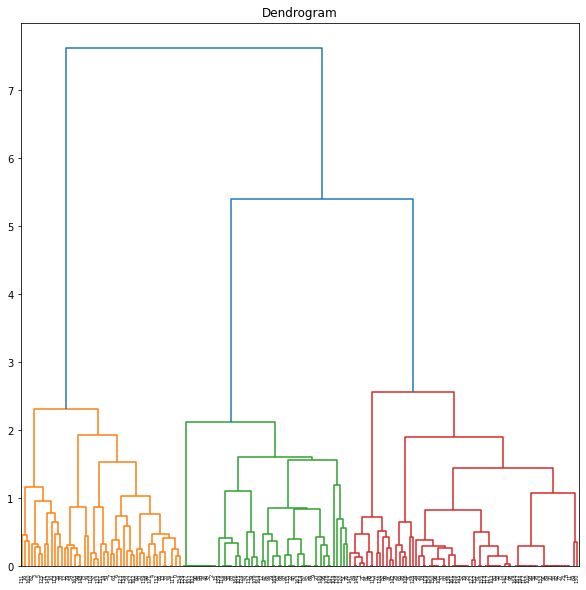

In [57]:
#Copy the sampled_data for further using
clustering_sample_data = sampled_data.copy()

#Filter the columns from the sampled_data
clustering_sample_data = clustering_sample_data.filter(["VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "PollutionR"])

#Dataframe to conduct clustering
clustering_sample_data

#normalize the regression_sample_data and renamed to regression_data_scaled
clustering_data_scaled = normalize(clustering_sample_data)

#Create a new dataframe of the regression_data_scaled
clustering_data_scaled = pd.DataFrame(clustering_data_scaled, columns=clustering_sample_data.columns)
print(clustering_data_scaled.head())


#plotting dendogram
plt.figure(figsize=(10, 10))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(clustering_data_scaled, method='ward'))

#we can see how many clusters are there on the base of the y-value
#This function fancy_dendrogram signifies the points where the clusters are merged and shows the distance at each point
#I thinkt it can be shown better , but I did not get it 

#saving the plot
#plt.savefig('Dendrogram.png')

#saving the dataset
#clustering_data_scaled.to_csv('clustering_data_scaled.csv')

plt.show()

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?


**Explanation:** <br>
The vertical line means the similarity scale/distance between clusters

The horizontal line shows all the instances from the dataset

Because the clusters are merged in order of the closest distance. It results in that each cluster searches for the closest cluster to merge, creates new cluster, and keep searching another cluster until everyone merges. Therefore, in each step there stays the less close clusters, and corresponding to this, the distance between clusters to be merged increases. This distance indicates the degree of similarity, and increased distances impliy that clusters are being less similar.

(c) Split the diagram at 3 and find the number the clusters at this point.

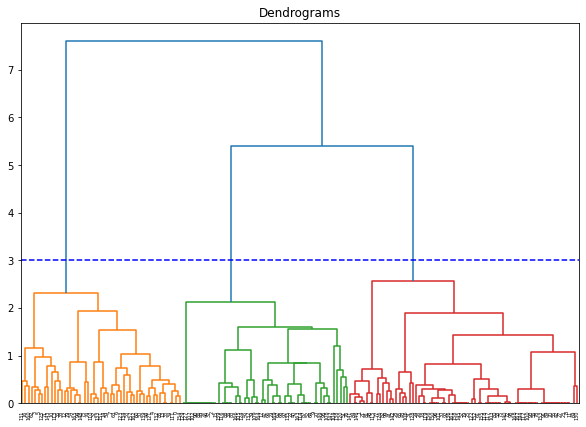

'\n3 Clusters can be observed\n'

In [58]:
#Plotting the dendogram with a splitline
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(clustering_data_scaled, method='ward'))
plt.axhline(y=3, color='b', linestyle='--')
plt.show()

#saving the plot
#plt.savefig('Dendrogram_split.png')

"""
3 Clusters can be observed
"""

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

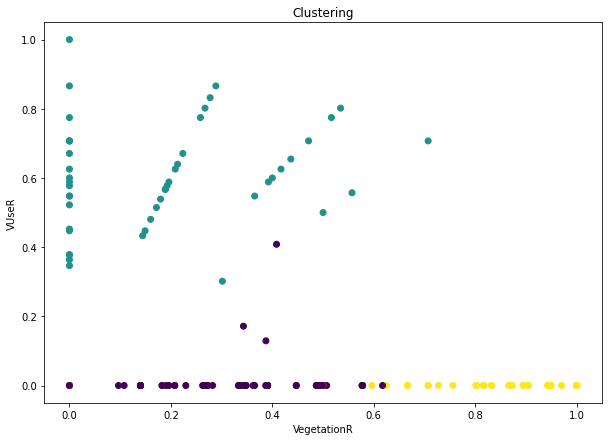

In [59]:
#execute AgglomerativeClustering
# the number of cluster found from the above is 3, thus n_cluster(the number of cluster) is 3
# affinity 
# linkage : criterien which distances should be considered by clustering and ward indicates that 

#Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(clustering_data_scaled)

#plotting clusters
plt.figure(figsize=(10, 7))
#plot is scattered by
# x-axis = VegetationR
# y-axis = UseR
# c = cluster.lables_ list of the cluster-index of each instances which are represented with dots

plt.scatter(clustering_data_scaled['VegetationR'], clustering_data_scaled['UseR'], c=cluster.labels_)
plt.ylabel("VUseR")
plt.xlabel("VegetationR")
plt.title("Clustering")

#saving the plot
#plt.savefig('Clustering.png')

plt.show()